# Load data

In [3]:
data_dir = '.';
load(sprintf('%s/data_simulation_10.mat',data_dir))

In [4]:
data_0 = permute(data_0, [3 2 1]);
data_1 = permute(data_1, [3 2 1]);

In [5]:
size(data_0), size(data_1)


ans =

        1000          25          50


ans =

        1000          25          50



In [6]:
num_trial = size(data_0, 1);
num_time = size(data_0, 3);

In [7]:
data = struct( ...
    'trialId', num2cell(1:num_trial), ...
    'T', num2cell(zeros(1,num_trial) + num_time), ...
    'y', cellfun(@(c) squeeze(c), num2cell(cat(2, data_0, data_1), [2 3])','UniformOutput',false) ...
)


data = 

  1x1000 struct array with fields:

    trialId
    T
    y



# Load external package

In [1]:
cd '../../../_external/DLAG/'

In [2]:
run("startup.m")

## Optional arguments

In [8]:
% Let's explicitly define all of the optional arguments, for 
% the sake of demonstration:
runIdx = 3;               % Results will be saved in baseDir/mat_results/runXXX/,  
                          % where XXX is runIdx. Use a new runIdx for each dataset.
baseDir = '.';            % Base directory where results will be saved
overwriteExisting = true; % Control whether existing results files are overwritten
saveData = false;         % Set to true to save train and test data (not recommended)
method = 'dlag';          % For now this is the only option, but that may change in the near future
binWidth = 1;          % Sample period / spike count bin width, in units of time (e.g., ms)
numFolds = 0;             % Number of cross-validation folds (0 means no cross-validation)
xDims_across = 3;         % This number of across-group latents matches the synthetic ground truth
xDims_within = {2, 2};    % These numbers match the within-group latents in the synthetic ground truth
yDims = [25 25];          % Number of observed features (neurons) in each group (area)
rGroups = [1 2];          % For performance evaluation, we can regress group 2's activity with group 1
startTau = 2*binWidth;    % Initial timescale, in the same units of time as binWidth
segLength = 50;           % Largest trial segment length, in no. of time points
init_method = 'static';   % Initialize DLAG with fitted pCCA parameters
learnDelays = true;       % Set to false if you want to fix delays at their initial value
maxIters = 5e5;           % Limit the number of EM iterations (not recommended for final fitting stage)
freqLL = 10;              % Check for data log-likelihood convergence every freqLL EM iterations
freqParam = 100;          % Store intermediate delay and timescale estimates every freqParam EM iterations
minVarFrac = 0.01;        % Private noise variances will not be allowed to go below this value
verbose = true;           % Toggle printed progress updates
randomSeed = 0;           % Seed the random number generator, for reproducibility

## Fitting DLAG

In [ ]:
fit_dlag(runIdx, data, ...
         'baseDir', baseDir, ...
         'method', method, ...
         'binWidth', binWidth, ...
         'numFolds', numFolds, ...
         'xDims_across', xDims_across, ...
         'xDims_within', xDims_within, ...
         'yDims', yDims, ...
         'rGroups', rGroups,...
         'startTau', startTau, ...
         'segLength', segLength, ...
         'init_method', init_method, ...
         'learnDelays', learnDelays, ...
         'maxIters', maxIters, ...
         'freqLL', freqLL, ...
         'freqParam', freqParam, ...
         'minVarFrac', minVarFrac, ...
         'parallelize', false, ... % Only relevant for cross-validation
         'verbose', verbose, ...
         'randomSeed', randomSeed, ...
         'overwriteExisting', overwriteExisting, ...
         'saveData', saveData);


---------------------------------------
Using existing directory ./mat_results/run003...

===== Training on all data =====
Number of training trials: 1000
Number of test trials: 0
Across-group latent dimensionality: 3
Within-group latent dimensionalities: 2  2
Observation dimensionality: 50

Initializing DLAG using pCCA...
LL converged after 1537 EM iterations. 2206453.402067f 500000        lik 2206448.230260

Fitting DLAG model...
EM iteration 3734 of 500000        lik 2615039.409727       lik 2615039.450160       lik 2615039.490561       lik 2615039.530928       lik 2615039.571263       lik 2615039.611565       lik 2615039.651835       lik 2615039.692072       lik 2615039.732277       lik 2615039.772451       lik 2615039.812592       lik 2615039.852701      lik 2566383.983267       lik 2569180.675446       lik 2571853.280787       lik 2574406.501256       lik 2576844.699593       lik 2579171.935627       lik 2581392.001152       lik 2583508.453337       lik 2585524.646726       lik 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 10662 of 500000       lik 2615059.481682       lik 2615059.517726       lik 2615059.553782       lik 2615059.589849       lik 2615059.625927       lik 2615059.662018       lik 2615059.698123       lik 2615059.734238       lik 2615059.770363       lik 2615059.806503       lik 2615059.842653       lik 2615059.878815       lik 2615059.914991       lik 2615059.951179       lik 2615059.987377       lik 2615060.023593       lik 2615060.059816       lik 2615060.096057       lik 2615060.132303       lik 2615060.168568       lik 2615060.204847       lik 2615060.241138       lik 2615060.277442       lik 2615060.313754       lik 2615060.350083       lik 2615060.386427       lik 2615060.422782       lik 2615060.459152       lik 2615060.495533       lik 2615060.531928       lik 2615060.568337       lik 2615060.604759       lik 2615060.641195       lik 2615060.677644       lik 2615060.714105       lik 2615060.750583       lik 2615060.787071       lik 2615060.823575       lik 2615060.860

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 19500 of 500000        lik 2615097.234305       lik 2615097.278125       lik 2615097.321934       lik 2615097.365724       lik 2615097.409495       lik 2615097.453252       lik 2615097.496997       lik 2615097.540722       lik 2615097.584428       lik 2615097.628121       lik 2615097.671798       lik 2615097.715459       lik 2615097.759103       lik 2615097.802732       lik 2615097.846341       lik 2615097.889939       lik 2615097.933517       lik 2615097.977077       lik 2615098.020622       lik 2615098.064149       lik 2615098.107660       lik 2615098.151154       lik 2615098.194635       lik 2615098.238100       lik 2615098.281544       lik 2615098.324969       lik 2615098.368381       lik 2615098.411774       lik 2615098.455151       lik 2615098.498511       lik 2615098.541853       lik 2615098.585176       lik 2615098.628486       lik 2615098.671777       lik 2615098.715054       lik 2615098.758312       lik 2615098.801552       lik 2615098.844776       lik 2615098.88

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 29416 of 500000        lik 2615135.245942       lik 2615135.281619       lik 2615135.317292       lik 2615135.352962       lik 2615135.388629       lik 2615135.424293       lik 2615135.459953       lik 2615135.495611       lik 2615135.531265       lik 2615135.566916       lik 2615135.602565       lik 2615135.638209       lik 2615135.673851       lik 2615135.709490       lik 2615135.745125       lik 2615135.780758       lik 2615135.816387       lik 2615135.852013       lik 2615135.887636       lik 2615135.923256       lik 2615135.958872       lik 2615135.994486       lik 2615136.030096       lik 2615136.065703       lik 2615136.101308       lik 2615136.136909       lik 2615136.172506       lik 2615136.208101       lik 2615136.243693       lik 2615136.279281       lik 2615136.314867       lik 2615136.350449       lik 2615136.386028       lik 2615136.421604       lik 2615136.457177       lik 2615136.492747       lik 2615136.528313       lik 2615136.563877       lik 2615136.59

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 40312 of 500000        lik 2615172.424433       lik 2615172.457082       lik 2615172.489729       lik 2615172.522374       lik 2615172.555016       lik 2615172.587655       lik 2615172.620292       lik 2615172.652926       lik 2615172.685558       lik 2615172.718187       lik 2615172.750814       lik 2615172.783438       lik 2615172.816060       lik 2615172.848679       lik 2615172.881296       lik 2615172.913910       lik 2615172.946522       lik 2615172.979131       lik 2615173.011738       lik 2615173.044342       lik 2615173.076943       lik 2615173.109542       lik 2615173.142139       lik 2615173.174733       lik 2615173.207325       lik 2615173.239914       lik 2615173.272500       lik 2615173.305084       lik 2615173.337666       lik 2615173.370245       lik 2615173.402821       lik 2615173.435395       lik 2615173.467967       lik 2615173.500536       lik 2615173.533102       lik 2615173.565666       lik 2615173.598228       lik 2615173.630787       lik 2615173.66

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 42529 of 500000        lik 2615179.547188       lik 2615179.579291       lik 2615179.611392       lik 2615179.643490       lik 2615179.675585       lik 2615179.707679       lik 2615179.739769       lik 2615179.771858       lik 2615179.803943       lik 2615179.836027       lik 2615179.868108       lik 2615179.900186       lik 2615179.932262       lik 2615179.964336       lik 2615179.996407       lik 2615180.028476       lik 2615180.060542       lik 2615180.092606       lik 2615180.124667       lik 2615180.156726       lik 2615180.188783       lik 2615180.220837       lik 2615180.252888       lik 2615180.284937       lik 2615180.316984       lik 2615180.349028       lik 2615180.381070       lik 2615180.413109       lik 2615180.445146       lik 2615180.477181       lik 2615180.509213       lik 2615180.541242       lik 2615180.573270       lik 2615180.605294       lik 2615180.637317       lik 2615180.669336       lik 2615180.701354       lik 2615180.733369       lik 2615180.76

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 44901 of 500000        lik 2615187.119256       lik 2615187.150784       lik 2615187.182309       lik 2615187.213833       lik 2615187.245354       lik 2615187.276873       lik 2615187.308389       lik 2615187.339903       lik 2615187.371414       lik 2615187.402923       lik 2615187.434430       lik 2615187.465934       lik 2615187.497436       lik 2615187.528936       lik 2615187.560433       lik 2615187.591928       lik 2615187.623420       lik 2615187.654911       lik 2615187.686398       lik 2615187.717884       lik 2615187.749367       lik 2615187.780847       lik 2615187.812325       lik 2615187.843801       lik 2615187.875275       lik 2615187.906746       lik 2615187.938214       lik 2615187.969681       lik 2615188.001145       lik 2615188.032606       lik 2615188.064065       lik 2615188.095522       lik 2615188.126977       lik 2615188.158429       lik 2615188.189879       lik 2615188.221326       lik 2615188.252771       lik 2615188.284213       lik 2615188.31

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 47573 of 500000        lik 2615195.484467       lik 2615195.515366       lik 2615195.546264       lik 2615195.577159       lik 2615195.608051       lik 2615195.638942       lik 2615195.669830       lik 2615195.700716       lik 2615195.731599       lik 2615195.762480       lik 2615195.793359       lik 2615195.824236       lik 2615195.855110       lik 2615195.885982       lik 2615195.916852       lik 2615195.947719       lik 2615195.978584       lik 2615196.009447       lik 2615196.040308       lik 2615196.071166       lik 2615196.102022       lik 2615196.132875       lik 2615196.163726       lik 2615196.194575       lik 2615196.225422       lik 2615196.256266       lik 2615196.287108       lik 2615196.317948       lik 2615196.348785       lik 2615196.379621       lik 2615196.410453       lik 2615196.441284       lik 2615196.472112       lik 2615196.502938       lik 2615196.533762       lik 2615196.564583       lik 2615196.595402       lik 2615196.626219       lik 2615196.65

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 50321 of 500000        lik 2615206.370883       lik 2615206.400975       lik 2615206.431065       lik 2615206.461153       lik 2615206.491238       lik 2615206.521321       lik 2615206.551402       lik 2615206.581480       lik 2615206.611557       lik 2615206.641631       lik 2615206.671703       lik 2615206.701773       lik 2615206.731840       lik 2615206.761906       lik 2615206.791969       lik 2615206.822030       lik 2615206.852089       lik 2615206.882145       lik 2615206.912199       lik 2615206.942252       lik 2615206.972301       lik 2615207.002349       lik 2615207.032395       lik 2615207.062438       lik 2615207.092479       lik 2615207.122518       lik 2615207.152554       lik 2615207.182589       lik 2615207.212621       lik 2615207.242651       lik 2615207.272679       lik 2615207.302704       lik 2615207.332728       lik 2615207.362749       lik 2615207.392768       lik 2615207.422785       lik 2615207.452799       lik 2615207.482811       lik 2615207.51

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 52068 of 500000        lik 2615210.055645       lik 2615210.085467       lik 2615210.115286       lik 2615210.145103       lik 2615210.174918       lik 2615210.204730       lik 2615210.234541       lik 2615210.264349       lik 2615210.294155       lik 2615210.323959       lik 2615210.353760       lik 2615210.383560       lik 2615210.413357       lik 2615210.443152       lik 2615210.472945       lik 2615210.502736       lik 2615210.532525       lik 2615210.562311       lik 2615210.592096       lik 2615210.621878       lik 2615210.651657       lik 2615210.681435       lik 2615210.711211       lik 2615210.740984       lik 2615210.770755       lik 2615210.800524       lik 2615210.830291       lik 2615210.860056       lik 2615210.889818       lik 2615210.919579       lik 2615210.949337       lik 2615210.979093       lik 2615211.008846       lik 2615211.038598       lik 2615211.068347       lik 2615211.098095       lik 2615211.127840       lik 2615211.157583       lik 2615211.18

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 53384 of 500000        lik 2615216.564196       lik 2615216.593543       lik 2615216.622888       lik 2615216.652231       lik 2615216.681572       lik 2615216.710911       lik 2615216.740248       lik 2615216.769582       lik 2615216.798915       lik 2615216.828245       lik 2615216.857573       lik 2615216.886899       lik 2615216.916223       lik 2615216.945545       lik 2615216.974864       lik 2615217.004182       lik 2615217.033497       lik 2615217.062810       lik 2615217.092122       lik 2615217.121431       lik 2615217.150738       lik 2615217.180042       lik 2615217.209345       lik 2615217.238646       lik 2615217.267944       lik 2615217.297240       lik 2615217.326535       lik 2615217.355827       lik 2615217.385117       lik 2615217.414404       lik 2615217.443690

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 57316 of 500000        lik 2615225.790912       lik 2615225.819597       lik 2615225.848280       lik 2615225.876961       lik 2615225.905639       lik 2615225.934316       lik 2615225.962991       lik 2615225.991663       lik 2615226.020334       lik 2615226.049002       lik 2615226.077669       lik 2615226.106333       lik 2615226.134996       lik 2615226.163656       lik 2615226.192315       lik 2615226.220971       lik 2615226.249625       lik 2615226.278278       lik 2615226.306928       lik 2615226.335576       lik 2615226.364222       lik 2615226.392866       lik 2615226.421508       lik 2615226.450148       lik 2615226.478786       lik 2615226.507422       lik 2615226.536056       lik 2615226.564688       lik 2615226.593318       lik 2615226.621946       lik 2615226.650572       lik 2615226.679196       lik 2615226.707817       lik 2615226.736437       lik 2615226.765055       lik 2615226.793670       lik 2615226.822284       lik 2615226.850896       lik 2615226.87

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 60461 of 500000        lik 2615234.699132       lik 2615234.727190       lik 2615234.755246       lik 2615234.783301       lik 2615234.811353       lik 2615234.839403       lik 2615234.867451       lik 2615234.895497       lik 2615234.923542       lik 2615234.951584       lik 2615234.979624       lik 2615235.007663       lik 2615235.035699       lik 2615235.063734       lik 2615235.091766       lik 2615235.119797       lik 2615235.147826       lik 2615235.175853       lik 2615235.203878       lik 2615235.231900       lik 2615235.259921       lik 2615235.287940       lik 2615235.315957       lik 2615235.343972       lik 2615235.371985       lik 2615235.399997       lik 2615235.428006       lik 2615235.456013       lik 2615235.484019       lik 2615235.512022       lik 2615235.540024       lik 2615235.568023       lik 2615235.596021       lik 2615235.624016       lik 2615235.652010       lik 2615235.680002       lik 2615235.707991       lik 2615235.735979       lik 2615235.76

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 64665 of 500000        lik 2615245.141137       lik 2615245.168479       lik 2615245.195820       lik 2615245.223158       lik 2615245.250495       lik 2615245.277830       lik 2615245.305163       lik 2615245.332494       lik 2615245.359823       lik 2615245.387150       lik 2615245.414476       lik 2615245.441800       lik 2615245.469122       lik 2615245.496442       lik 2615245.523760       lik 2615245.551076       lik 2615245.578391       lik 2615245.605704       lik 2615245.633015       lik 2615245.660324       lik 2615245.687631       lik 2615245.714936       lik 2615245.742240       lik 2615245.769541       lik 2615245.796841       lik 2615245.824139       lik 2615245.851435       lik 2615245.878730       lik 2615245.906022       lik 2615245.933313       lik 2615245.960602       lik 2615245.987889       lik 2615246.015174       lik 2615246.042457       lik 2615246.069739       lik 2615246.097018       lik 2615246.124296       lik 2615246.151572       lik 2615246.17

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 71470 of 500000        lik 2615265.540825       lik 2615265.566842       lik 2615265.592858       lik 2615265.618872       lik 2615265.644885       lik 2615265.670896       lik 2615265.696905       lik 2615265.722913       lik 2615265.748919       lik 2615265.774923       lik 2615265.800926       lik 2615265.826927       lik 2615265.852927       lik 2615265.878925       lik 2615265.904921       lik 2615265.930916       lik 2615265.956909       lik 2615265.982901       lik 2615266.008891       lik 2615266.034879       lik 2615266.060866       lik 2615266.086851       lik 2615266.112834       lik 2615266.138816       lik 2615266.164796       lik 2615266.190775       lik 2615266.216752       lik 2615266.242728       lik 2615266.268701       lik 2615266.294674       lik 2615266.320644       lik 2615266.346613       lik 2615266.372581       lik 2615266.398546       lik 2615266.424510       lik 2615266.450473       lik 2615266.476434       lik 2615266.502393       lik 2615266.52

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 74309 of 500000        lik 2615270.609671       lik 2615270.635376       lik 2615270.661081       lik 2615270.686783       lik 2615270.712484       lik 2615270.738184       lik 2615270.763882       lik 2615270.789578       lik 2615270.815273       lik 2615270.840967       lik 2615270.866658       lik 2615270.892348       lik 2615270.918037       lik 2615270.943724       lik 2615270.969410       lik 2615270.995094       lik 2615271.020776       lik 2615271.046457       lik 2615271.072136       lik 2615271.097814       lik 2615271.123490       lik 2615271.149165       lik 2615271.174838       lik 2615271.200509       lik 2615271.226179       lik 2615271.251848       lik 2615271.277515       lik 2615271.303180       lik 2615271.328844       lik 2615271.354506       lik 2615271.380166       lik 2615271.405825       lik 2615271.431483       lik 2615271.457139       lik 2615271.482793       lik 2615271.508446       lik 2615271.534098       lik 2615271.559747       lik 2615271.58

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 77519 of 500000        lik 2615278.858278       lik 2615278.883493       lik 2615278.908706       lik 2615278.933918       lik 2615278.959129       lik 2615278.984338       lik 2615279.009546       lik 2615279.034752       lik 2615279.059957       lik 2615279.085160       lik 2615279.110362       lik 2615279.135562       lik 2615279.160761       lik 2615279.185958       lik 2615279.211154       lik 2615279.236349       lik 2615279.261542       lik 2615279.286734       lik 2615279.311924       lik 2615279.337112       lik 2615279.362299       lik 2615279.387485       lik 2615279.412669       lik 2615279.437852       lik 2615279.463033       lik 2615279.488213       lik 2615279.513391       lik 2615279.538568       lik 2615279.563744       lik 2615279.588918       lik 2615279.614090       lik 2615279.639261       lik 2615279.664431       lik 2615279.689599       lik 2615279.714766       lik 2615279.739931       lik 2615279.765095       lik 2615279.790257       lik 2615279.81

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 79597 of 500000        lik 2615284.071789       lik 2615284.096704       lik 2615284.121618       lik 2615284.146531       lik 2615284.171442       lik 2615284.196352       lik 2615284.221260       lik 2615284.246167       lik 2615284.271073       lik 2615284.295977       lik 2615284.320879       lik 2615284.345781       lik 2615284.370681       lik 2615284.395579       lik 2615284.420476       lik 2615284.445372       lik 2615284.470266       lik 2615284.495159       lik 2615284.520051       lik 2615284.544941       lik 2615284.569829       lik 2615284.594717       lik 2615284.619602       lik 2615284.644487       lik 2615284.669370       lik 2615284.694252       lik 2615284.719132       lik 2615284.744011       lik 2615284.768888       lik 2615284.793764       lik 2615284.818639       lik 2615284.843512       lik 2615284.868384       lik 2615284.893254       lik 2615284.918123       lik 2615284.942990       lik 2615284.967857       lik 2615284.992721       lik 2615285.01

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 82543 of 500000        lik 2615291.361720       lik 2615291.386230       lik 2615291.410739       lik 2615291.435246       lik 2615291.459752       lik 2615291.484257       lik 2615291.508760       lik 2615291.533263       lik 2615291.557764       lik 2615291.582263       lik 2615291.606761       lik 2615291.631258       lik 2615291.655753       lik 2615291.680248       lik 2615291.704740       lik 2615291.729232       lik 2615291.753722       lik 2615291.778211       lik 2615291.802698       lik 2615291.827184       lik 2615291.851669       lik 2615291.876153       lik 2615291.900635       lik 2615291.925116       lik 2615291.949595       lik 2615291.974073       lik 2615291.998550       lik 2615292.023026       lik 2615292.047500       lik 2615292.071973       lik 2615292.096444       lik 2615292.120914       lik 2615292.145383       lik 2615292.169851       lik 2615292.194317       lik 2615292.218782       lik 2615292.243245       lik 2615292.267708       lik 2615292.29

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 85338 of 500000        lik 2615300.124879       lik 2615300.148922       lik 2615300.172963       lik 2615300.197004       lik 2615300.221043       lik 2615300.245081       lik 2615300.269117       lik 2615300.293152       lik 2615300.317187       lik 2615300.341219       lik 2615300.365251       lik 2615300.389281       lik 2615300.413310       lik 2615300.437338       lik 2615300.461364       lik 2615300.485390       lik 2615300.509414       lik 2615300.533436       lik 2615300.557458       lik 2615300.581478       lik 2615300.605497       lik 2615300.629515       lik 2615300.653532       lik 2615300.677547       lik 2615300.701561       lik 2615300.725574       lik 2615300.749585       lik 2615300.773595       lik 2615300.797604       lik 2615300.821612       lik 2615300.845619       lik 2615300.869624       lik 2615300.893628       lik 2615300.917631       lik 2615300.941632       lik 2615300.965632       lik 2615300.989631       lik 2615301.013629       lik 2615301.03

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 86427 of 500000        lik 2615302.403373       lik 2615302.427297       lik 2615302.451220       lik 2615302.475142       lik 2615302.499063       lik 2615302.522983       lik 2615302.546901       lik 2615302.570818       lik 2615302.594734       lik 2615302.618649       lik 2615302.642562       lik 2615302.666475       lik 2615302.690385       lik 2615302.714295       lik 2615302.738204       lik 2615302.762111       lik 2615302.786017       lik 2615302.809922       lik 2615302.833825       lik 2615302.857728       lik 2615302.881629       lik 2615302.905529       lik 2615302.929427       lik 2615302.953325       lik 2615302.977221       lik 2615303.001116       lik 2615303.025009       lik 2615303.048902       lik 2615303.072793       lik 2615303.096683       lik 2615303.120572       lik 2615303.144459       lik 2615303.168346       lik 2615303.192231       lik 2615303.216115       lik 2615303.239997       lik 2615303.263878       lik 2615303.287759       lik 2615303.31

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 87688 of 500000        lik 2615305.693358       lik 2615305.717114       lik 2615305.740868       lik 2615305.764622       lik 2615305.788374       lik 2615305.812125       lik 2615305.835875       lik 2615305.859623       lik 2615305.883371       lik 2615305.907117       lik 2615305.930862       lik 2615305.954605       lik 2615305.978348       lik 2615306.002089       lik 2615306.025829       lik 2615306.049568       lik 2615306.073306       lik 2615306.097042       lik 2615306.120777       lik 2615306.144511       lik 2615306.168244       lik 2615306.191976       lik 2615306.215706       lik 2615306.239436       lik 2615306.263163       lik 2615306.286890       lik 2615306.310616       lik 2615306.334340       lik 2615306.358064       lik 2615306.381786       lik 2615306.405506       lik 2615306.429226       lik 2615306.452944       lik 2615306.476661       lik 2615306.500377       lik 2615306.524092       lik 2615306.547806       lik 2615306.571518       lik 2615306.59

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 91010 of 500000        lik 2615311.641998       lik 2615311.665454       lik 2615311.688909       lik 2615311.712363       lik 2615311.735816       lik 2615311.759267       lik 2615311.782718       lik 2615311.806167       lik 2615311.829615       lik 2615311.853062       lik 2615311.876507       lik 2615311.899952       lik 2615311.923395       lik 2615311.946837       lik 2615311.970278       lik 2615311.993718       lik 2615312.017156       lik 2615312.040594       lik 2615312.064030       lik 2615312.087465       lik 2615312.110899       lik 2615312.134332       lik 2615312.157764       lik 2615312.181194       lik 2615312.204623       lik 2615312.228051       lik 2615312.251478       lik 2615312.274904       lik 2615312.298329       lik 2615312.321752       lik 2615312.345174       lik 2615312.368596       lik 2615312.392016       lik 2615312.415434       lik 2615312.438852       lik 2615312.462268       lik 2615312.485684       lik 2615312.509098       lik 2615312.53

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 93293 of 500000        lik 2615317.840519       lik 2615317.863669       lik 2615317.886817       lik 2615317.909965       lik 2615317.933111       lik 2615317.956256       lik 2615317.979400       lik 2615318.002542       lik 2615318.025684       lik 2615318.048825       lik 2615318.071964       lik 2615318.095102       lik 2615318.118239       lik 2615318.141375       lik 2615318.164510       lik 2615318.187643       lik 2615318.210776       lik 2615318.233907       lik 2615318.257038       lik 2615318.280167       lik 2615318.303295       lik 2615318.326422       lik 2615318.349547       lik 2615318.372672       lik 2615318.395795       lik 2615318.418917       lik 2615318.442039       lik 2615318.465159       lik 2615318.488278       lik 2615318.511395       lik 2615318.534512       lik 2615318.557627       lik 2615318.580742       lik 2615318.603855       lik 2615318.626967       lik 2615318.650078       lik 2615318.673188       lik 2615318.696297       lik 2615318.71

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 99345 of 500000        lik 2615330.808704       lik 2615330.831218       lik 2615330.853732       lik 2615330.876245       lik 2615330.898757       lik 2615330.921267       lik 2615330.943776       lik 2615330.966285       lik 2615330.988792       lik 2615331.011298       lik 2615331.033803       lik 2615331.056307       lik 2615331.078809       lik 2615331.101311       lik 2615331.123811       lik 2615331.146311       lik 2615331.168809       lik 2615331.191306       lik 2615331.213802       lik 2615331.236297       lik 2615331.258791       lik 2615331.281284       lik 2615331.303776       lik 2615331.326266       lik 2615331.348756       lik 2615331.371244       lik 2615331.393731       lik 2615331.416217       lik 2615331.438702       lik 2615331.461186       lik 2615331.483669       lik 2615331.506151       lik 2615331.528631       lik 2615331.551111       lik 2615331.573589       lik 2615331.596066       lik 2615331.618543       lik 2615331.641018       lik 2615331.66

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 109217 of 500000        lik 2615352.481022       lik 2615352.502393       lik 2615352.523764       lik 2615352.545134       lik 2615352.566500       lik 2615352.587865       lik 2615352.609229       lik 2615352.630591       lik 2615352.651950       lik 2615352.673309       lik 2615352.694666       lik 2615352.716021       lik 2615352.737374       lik 2615352.758726       lik 2615352.780077       lik 2615352.801429       lik 2615352.822778       lik 2615352.844127       lik 2615352.865471       lik 2615352.886817       lik 2615352.908162       lik 2615352.929505       lik 2615352.950847       lik 2615352.972187       lik 2615352.993526       lik 2615353.014865       lik 2615353.036198       lik 2615353.057533       lik 2615353.078864       lik 2615353.100193       lik 2615353.121521       lik 2615353.142851       lik 2615353.164180       lik 2615353.185504       lik 2615353.206827       lik 2615353.228152       lik 2615353.249475       lik 2615353.270795       lik 2615353.2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 112052 of 500000        lik 2615358.561592       lik 2615358.582595       lik 2615358.603598       lik 2615358.624599       lik 2615358.645599       lik 2615358.666598       lik 2615358.687596       lik 2615358.708591       lik 2615358.729585       lik 2615358.750577       lik 2615358.771569       lik 2615358.792560       lik 2615358.813549       lik 2615358.834537       lik 2615358.855524       lik 2615358.876510       lik 2615358.897494       lik 2615358.918477       lik 2615358.939460       lik 2615358.960439       lik 2615358.981418       lik 2615359.002395       lik 2615359.023372       lik 2615359.044345       lik 2615359.065319       lik 2615359.086292       lik 2615359.107263       lik 2615359.128233       lik 2615359.149201       lik 2615359.170169       lik 2615359.191135       lik 2615359.212097       lik 2615359.233060       lik 2615359.254022       lik 2615359.274981       lik 2615359.295939       lik 2615359.316897       lik 2615359.337852       lik 2615359.3

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 115319 of 500000        lik 2615365.297384       lik 2615365.318026       lik 2615365.338668       lik 2615365.359311       lik 2615365.379953       lik 2615365.400592       lik 2615365.421232       lik 2615365.441872       lik 2615365.462510       lik 2615365.483149       lik 2615365.503786       lik 2615365.524424       lik 2615365.545060       lik 2615365.565696       lik 2615365.586332       lik 2615365.606967       lik 2615365.627601       lik 2615365.648236       lik 2615365.668869       lik 2615365.689502       lik 2615365.710135       lik 2615365.730767       lik 2615365.751398       lik 2615365.772029       lik 2615365.792660       lik 2615365.813290       lik 2615365.833919       lik 2615365.854549       lik 2615365.875177       lik 2615365.895805       lik 2615365.916432       lik 2615365.937057       lik 2615365.957681       lik 2615365.978303       lik 2615365.998925       lik 2615366.019545       lik 2615366.040164       lik 2615366.060781       lik 2615366.0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 118824 of 500000        lik 2615372.470985       lik 2615372.491194       lik 2615372.511401       lik 2615372.531607       lik 2615372.551812       lik 2615372.572016       lik 2615372.592218       lik 2615372.612419       lik 2615372.632618       lik 2615372.652816       lik 2615372.673013       lik 2615372.693209       lik 2615372.713403       lik 2615372.733596       lik 2615372.753787       lik 2615372.773977       lik 2615372.794166       lik 2615372.814354       lik 2615372.834540       lik 2615372.854725       lik 2615372.874908       lik 2615372.895090       lik 2615372.915271       lik 2615372.935451       lik 2615372.955629       lik 2615372.975806       lik 2615372.995981       lik 2615373.016156       lik 2615373.036329       lik 2615373.056500       lik 2615373.076670       lik 2615373.096839       lik 2615373.117007       lik 2615373.137173       lik 2615373.157338       lik 2615373.177502       lik 2615373.197664       lik 2615373.217825       lik 2615373.2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 122591 of 500000        lik 2615382.230402       lik 2615382.249938       lik 2615382.269472       lik 2615382.289005       lik 2615382.308537       lik 2615382.328067       lik 2615382.347596       lik 2615382.367124       lik 2615382.386650       lik 2615382.406174       lik 2615382.425697       lik 2615382.445219       lik 2615382.464739       lik 2615382.484258       lik 2615382.503776       lik 2615382.523292       lik 2615382.542806       lik 2615382.562320       lik 2615382.581831       lik 2615382.601342       lik 2615382.620851       lik 2615382.640358       lik 2615382.659864       lik 2615382.679369       lik 2615382.698872       lik 2615382.718374       lik 2615382.737875       lik 2615382.757374       lik 2615382.776871       lik 2615382.796368       lik 2615382.815862       lik 2615382.835356       lik 2615382.854848       lik 2615382.874338       lik 2615382.893827       lik 2615382.913315

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 125718 of 500000        lik 2615386.070701       lik 2615386.089953       lik 2615386.109204       lik 2615386.128454       lik 2615386.147702       lik 2615386.166948       lik 2615386.186194       lik 2615386.205437       lik 2615386.224680       lik 2615386.243921       lik 2615386.263160       lik 2615386.282398       lik 2615386.301635       lik 2615386.320870       lik 2615386.340103       lik 2615386.359335       lik 2615386.378566       lik 2615386.397795       lik 2615386.417023       lik 2615386.436250       lik 2615386.455475       lik 2615386.474698       lik 2615386.493920       lik 2615386.513141       lik 2615386.532360       lik 2615386.551577       lik 2615386.570794       lik 2615386.590008       lik 2615386.609222       lik 2615386.628434       lik 2615386.647644       lik 2615386.666853       lik 2615386.686061       lik 2615386.705267       lik 2615386.724471       lik 2615386.743674       lik 2615386.762876       lik 2615386.782076       lik 2615386.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 132974 of 500000        lik 2615400.707523       lik 2615400.725593       lik 2615400.743661       lik 2615400.761728       lik 2615400.779793       lik 2615400.797857       lik 2615400.815919       lik 2615400.833979       lik 2615400.852038       lik 2615400.870096       lik 2615400.888152       lik 2615400.906206       lik 2615400.924259       lik 2615400.942310       lik 2615400.960359       lik 2615400.978407       lik 2615400.996454       lik 2615401.014499       lik 2615401.032542       lik 2615401.050584       lik 2615401.068624       lik 2615401.086662       lik 2615401.104700       lik 2615401.122735       lik 2615401.140769       lik 2615401.158801       lik 2615401.176832       lik 2615401.194861       lik 2615401.212889       lik 2615401.230915       lik 2615401.248940       lik 2615401.266963       lik 2615401.284984       lik 2615401.303004       lik 2615401.321022       lik 2615401.339039       lik 2615401.357054       lik 2615401.375067       lik 2615401.3

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 134003 of 500000        lik 2615403.168492       lik 2615403.186347       lik 2615403.204200       lik 2615403.222052       lik 2615403.239902       lik 2615403.257750       lik 2615403.275597       lik 2615403.293443       lik 2615403.311286       lik 2615403.329128       lik 2615403.346969       lik 2615403.364808       lik 2615403.382645       lik 2615403.400481       lik 2615403.418315       lik 2615403.436148       lik 2615403.453979       lik 2615403.471808       lik 2615403.489636       lik 2615403.507463       lik 2615403.525287       lik 2615403.543110       lik 2615403.560932       lik 2615403.578752       lik 2615403.596570       lik 2615403.614387       lik 2615403.632203       lik 2615403.650016       lik 2615403.667828       lik 2615403.685639       lik 2615403.703448       lik 2615403.721255       lik 2615403.739061       lik 2615403.756865       lik 2615403.774668       lik 2615403.792469       lik 2615403.810268       lik 2615403.828066       lik 2615403.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 136741 of 500000        lik 2615406.374388       lik 2615406.391956       lik 2615406.409521       lik 2615406.427086       lik 2615406.444648       lik 2615406.462209       lik 2615406.479769       lik 2615406.497326       lik 2615406.514882       lik 2615406.532437       lik 2615406.549990       lik 2615406.567541       lik 2615406.585091       lik 2615406.602639       lik 2615406.620186       lik 2615406.637731       lik 2615406.655274       lik 2615406.672816       lik 2615406.690356       lik 2615406.707895       lik 2615406.725432       lik 2615406.742967       lik 2615406.760501       lik 2615406.778034       lik 2615406.795564       lik 2615406.813093       lik 2615406.830621       lik 2615406.848146       lik 2615406.865671       lik 2615406.883193       lik 2615406.900714       lik 2615406.918234       lik 2615406.935751       lik 2615406.953268       lik 2615406.970782       lik 2615406.988295       lik 2615407.005807       lik 2615407.023317       lik 2615407.0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 152466 of 500000        lik 2615433.406712       lik 2615433.421540       lik 2615433.436366       lik 2615433.451191       lik 2615433.466014       lik 2615433.480835       lik 2615433.495655       lik 2615433.510473       lik 2615433.525290       lik 2615433.540105       lik 2615433.554918       lik 2615433.569729       lik 2615433.584539       lik 2615433.599347       lik 2615433.614154       lik 2615433.628959       lik 2615433.643762       lik 2615433.658564       lik 2615433.673364       lik 2615433.688162       lik 2615433.702958       lik 2615433.717753       lik 2615433.732547       lik 2615433.747338       lik 2615433.762128       lik 2615433.776917       lik 2615433.791703       lik 2615433.806488       lik 2615433.821272       lik 2615433.836054       lik 2615433.850834       lik 2615433.865612       lik 2615433.880389       lik 2615433.895164       lik 2615433.909937       lik 2615433.924709       lik 2615433.939479       lik 2615433.954248       lik 2615433.9

## results

In [47]:
xDim_across = 3;
xDim_within = [2 2];
xDim_total = xDim_across + xDim_within;

In [48]:
% Retrieve the fitted model of interest
res = getModel_dlag(runIdx, xDim_across, xDim_within, ...
                    'baseDir', baseDir);

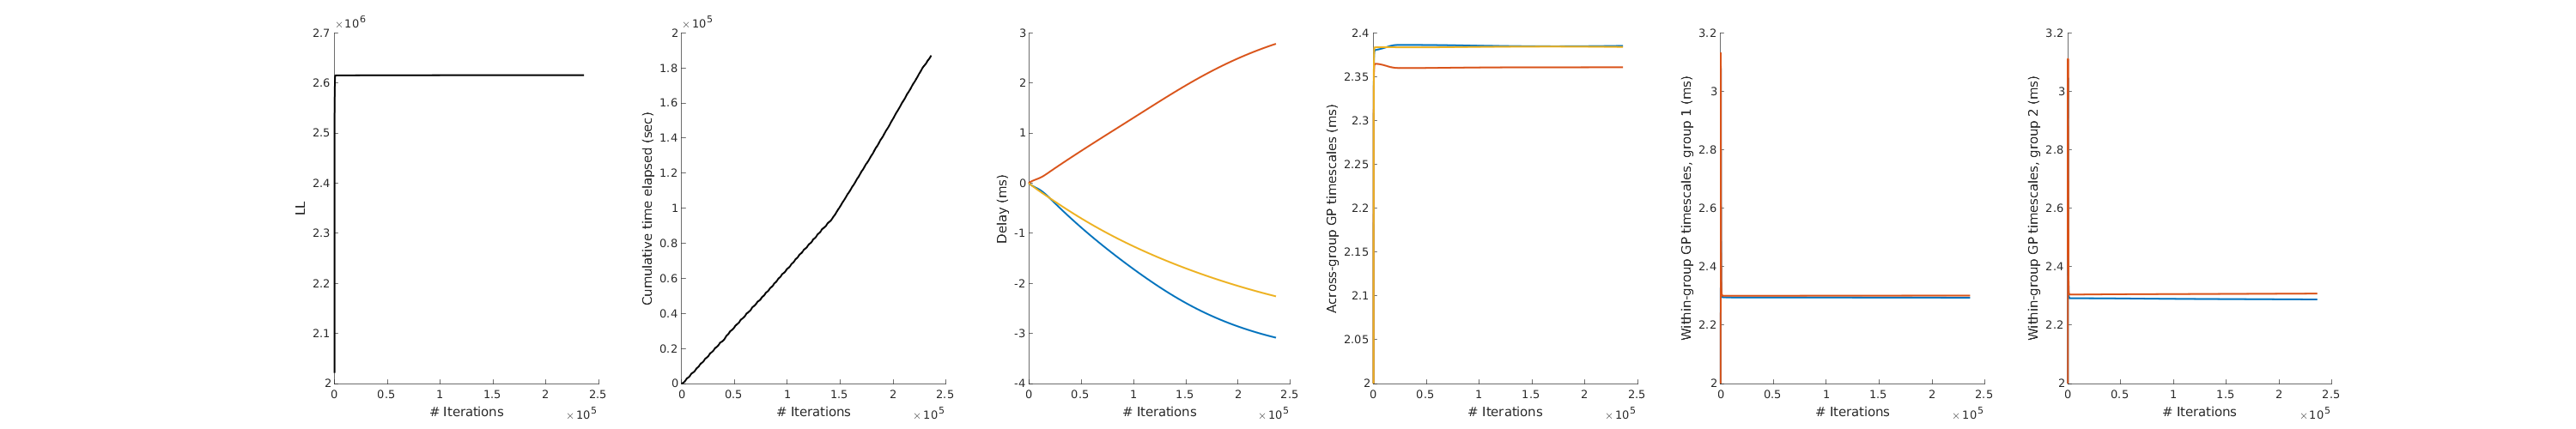

In [49]:
%plot -s 3000,500
% Plot training progress of various quantities. These plots can help with
% troubleshooting, if necessary.
plotFittingProgress(res, ...
                    'freqLL', freqLL, ...
                    'freqParam', freqParam, ...
                    'units', 'ms');

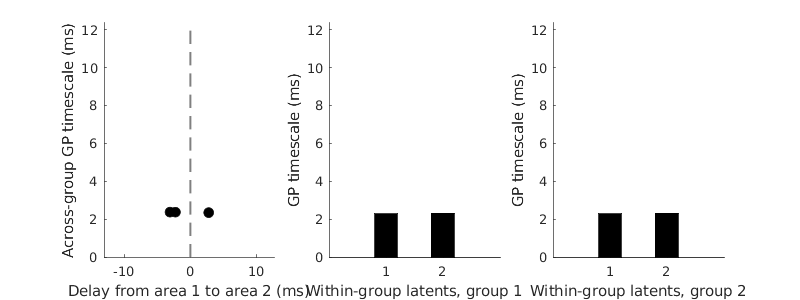

In [50]:
%plot -s 800,300
% Plot estimated and ground truth delays and across-group GP timescales
% together on the same plot. For these scatterplots, it's more
% straightforward to match ground truth latents to corresponding
% estimates.
plotGPparams_dlag(res.estParams, res.binWidth,...
                  res.rGroups, 'units', 'ms');

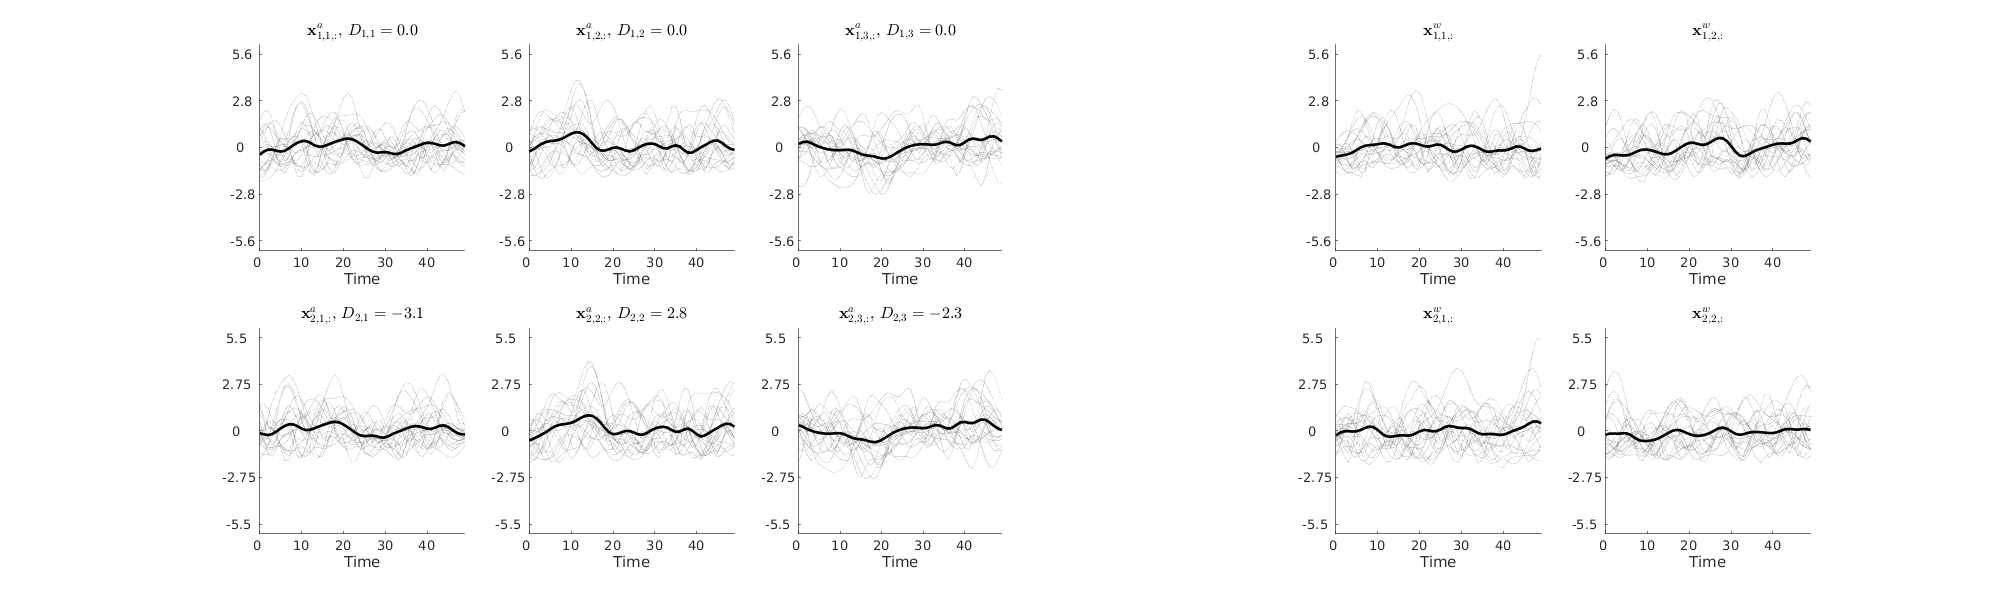

In [51]:
%plot -s 2000,600
% Plot estimated latents
[seqTrain, ~] = exactInferenceWithLL_dlag(data, res.estParams);
plotDimsVsTime_dlag(seqTrain, 'xsm', res.estParams, res.binWidth, ...
                  'nPlotMax', 20, ...
                  'plotSingle', true, ...
                  'plotMean', true, ...
                  'units', []);

In [52]:
groupSeq = partitionObs(seqTrain, xDim_total, 'datafield', 'xsm');

In [53]:
[latent_across_1, latent_within_1] = partitionLatents_meanOnly(groupSeq{1}, ...
    xDim_across, xDim_within(1), 'xpec', 'xsm');

In [54]:
[latent_across_2, latent_within_2] = partitionLatents_meanOnly(groupSeq{2}, ...
    xDim_across, xDim_within(2), 'xpec', 'xsm');

In [55]:
latent_across_1 = cat(3,latent_across_1.xsm);
latent_across_2 = cat(3,latent_across_2.xsm);

In [56]:
latent_across = cat(2, latent_across_1, latent_across_2);

In [57]:
latent_sigma = cellfun(@(x) cov(squeeze(x)'), ...
    num2cell(latent_across, [2 3]), 'UniformOutput', false);


cb = 

  ColorBar with properties:

    Location: 'layout'
      Limits: [0 2]
    FontSize: 9
    Position: [0.9325 0.3825 0.0214 0.2700]
       Units: 'normalized'

  Use GET to show all properties



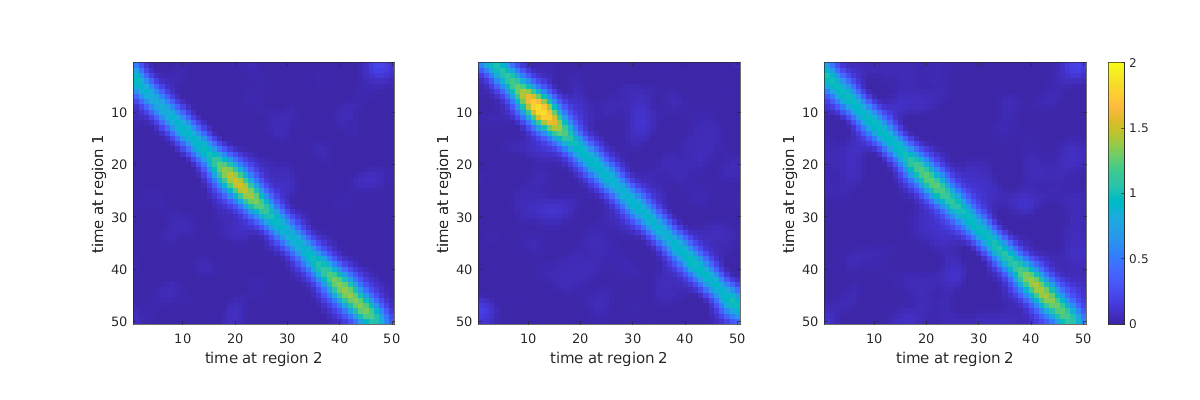

In [58]:
%plot -s 1200,400
tcl = tiledlayout(1,3);
for i = 1:3
    nexttile()
    imagesc(latent_sigma{i}(1:num_time,num_time+1:2*num_time))
    caxis([0 2])
    axis square
    xlabel('time at region 2')
    ylabel('time at region 1')
end
cb = colorbar(); 
cb.Layout.Tile = 'east'

In [59]:
latent_rho = cellfun(@(x) corrcoef(squeeze(x)'), ...
    num2cell(latent_across, [2 3]), 'UniformOutput', false);


cb = 

  ColorBar with properties:

    Location: 'layout'
      Limits: [0 1]
    FontSize: 9
    Position: [0.9325 0.1100 0.0214 0.8150]
       Units: 'normalized'

  Use GET to show all properties



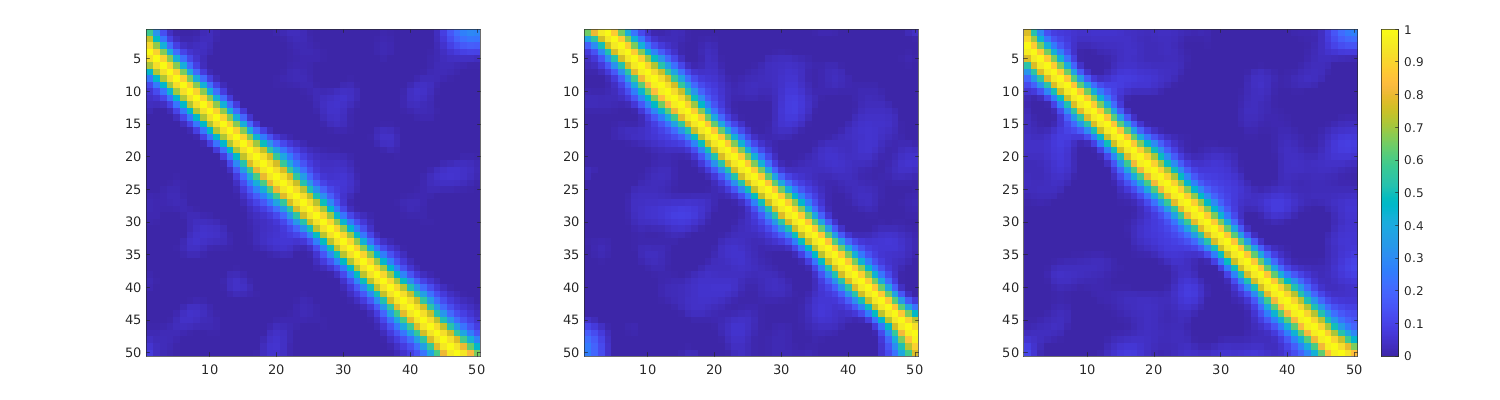

In [60]:
%plot -s 1500,400
tcl = tiledlayout(1,3);
for i = 1:3
    nexttile()
    imagesc(latent_rho{i}(1:num_time,num_time+1:2*num_time))
    caxis([0 1])
end
cb = colorbar(); 
cb.Layout.Tile = 'east'

In [61]:
groupParams = partitionParams_dlag(res.estParams);

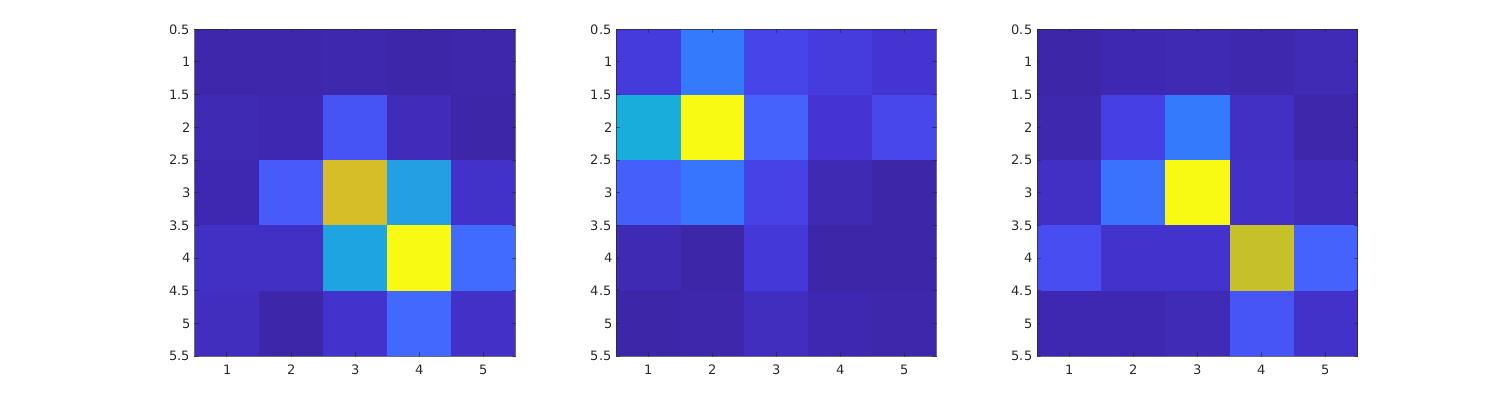

In [62]:
%plot -s 1500,400
for i = 1:xDim_across
    subplot(1,3,i)
    imagesc(abs(reshape(groupParams{1}.C(:,i), 5, 5)))
end

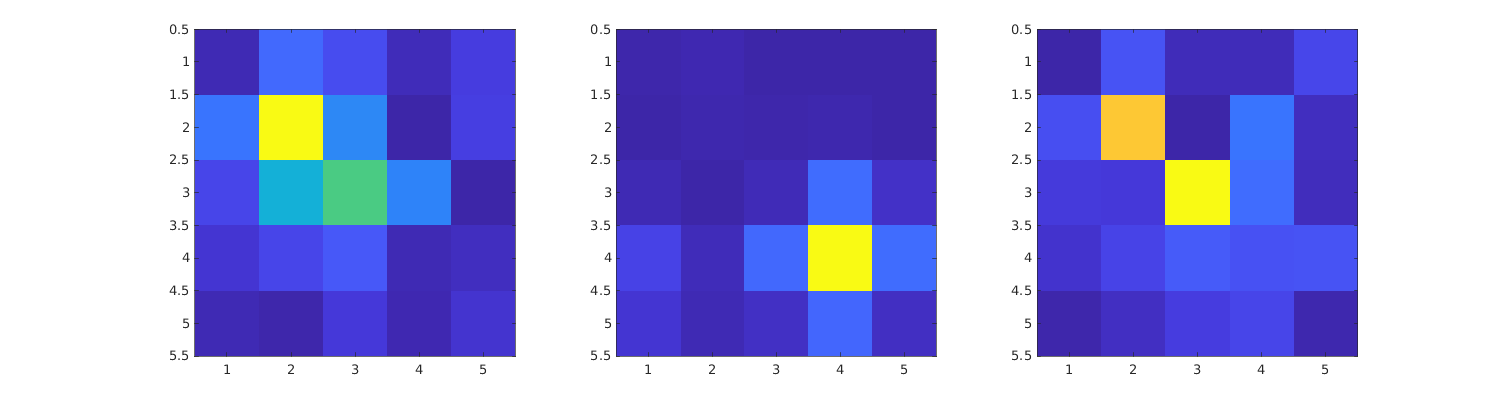

In [63]:
%plot -s 1500,400
for i = 1:xDim_across
    subplot(1,3,i)
    imagesc(abs(reshape(groupParams{2}.C(:,i), 5, 5)))
end

## extended Fitting DLAG

In [65]:
res.estParams


ans = 

  struct with fields:

               d: [50x1 double]
               R: [50x50 double]
               C: [50x10 double]
     DelayMatrix: [2x3 double]
     xDim_across: 3
     xDim_within: [2 2]
           yDims: [25 25]
         covType: 'rbf'
    gamma_across: [0.1758 0.1794 0.1760]
    gamma_within: {[0.1901 0.1889]  [0.1911 0.1877]}
      eps_across: [1.0000e-03 1.0000e-03 1.0000e-03]
      eps_within: {[1.0000e-03 1.0000e-03]  [1.0000e-03 1.0000e-03]}
           notes: [1x1 struct]
        maxDelay: 25



In [71]:
fit_dlag(5, data, ...
         'baseDir', baseDir, ...
         'method', method, ...
         'binWidth', binWidth, ...
         'numFolds', numFolds, ...
         'xDims_across', xDims_across, ...
         'xDims_within', xDims_within, ...
         'yDims', yDims, ...
         'rGroups', rGroups,...
         'startTau', startTau, ...
         'segLength', segLength, ...
         'init_method', 'params', ...
         'learnDelays', learnDelays, ...
         'maxIters', maxIters, ...
         'freqLL', freqLL, ...
         'freqParam', freqParam, ...
         'minVarFrac', minVarFrac, ...
         'parallelize', false, ... % Only relevant for cross-validation
         'verbose', verbose, ...
         'randomSeed', randomSeed, ...
         'overwriteExisting', overwriteExisting, ...
         'saveData', saveData, ...
         'initParams', res.estParams);


---------------------------------------
Using existing directory ./mat_results/run005...

===== Training on all data =====
Number of training trials: 1000
Number of test trials: 0
Across-group latent dimensionality: 3
Within-group latent dimensionalities: 2  2
Observation dimensionality: 50

Initializing DLAG using params...

Fitting DLAG model...


EM iteration 19701 of 500000        lik 2615515.155464       lik 2615515.158931       lik 2615515.162397       lik 2615515.165863       lik 2615515.169328       lik 2615515.172792       lik 2615515.176256       lik 2615515.179719       lik 2615515.183182       lik 2615515.186645       lik 2615515.190106       lik 2615515.193568       lik 2615515.197028       lik 2615515.200488       lik 2615515.203948       lik 2615515.207407       lik 2615515.210865       lik 2615515.214323       lik 2615515.217780       lik 2615515.221237       lik 2615515.224693       lik 2615515.228149       lik 2615515.231604       lik 2615515.235058       lik 2615515.238512       lik 2615515.241966       lik 2615515.245419       lik 2615515.248871       lik 2615515.252323       lik 2615515.255774       lik 2615515.259225       lik 2615515.262675       lik 2615515.266124       lik 2615515.269573       lik 2615515.273022       lik 2615515.276470       lik 2615515.279917       lik 2615515.283364       lik 2615515.28

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 25977 of 500000        lik 2615517.800773       lik 2615517.803824       lik 2615517.806874       lik 2615517.809925       lik 2615517.812974       lik 2615517.816024       lik 2615517.819072       lik 2615517.822121       lik 2615517.825169       lik 2615517.828216       lik 2615517.831263       lik 2615517.834309       lik 2615517.837355       lik 2615517.840400       lik 2615517.843445       lik 2615517.846490       lik 2615517.849534       lik 2615517.852577       lik 2615517.855620       lik 2615517.858663       lik 2615517.861705       lik 2615517.864747       lik 2615517.867788       lik 2615517.870828       lik 2615517.873869       lik 2615517.876908       lik 2615517.879948       lik 2615517.882986       lik 2615517.886025       lik 2615517.889062       lik 2615517.892100       lik 2615517.895137       lik 2615517.898173       lik 2615517.901209       lik 2615517.904244       lik 2615517.907279       lik 2615517.910314       lik 2615517.913348       lik 2615517.91

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 41968 of 500000        lik 2615522.119259       lik 2615522.121638       lik 2615522.124018       lik 2615522.126396       lik 2615522.128775       lik 2615522.131153       lik 2615522.133531       lik 2615522.135908       lik 2615522.138285       lik 2615522.140661       lik 2615522.143038       lik 2615522.145413       lik 2615522.147789       lik 2615522.150164       lik 2615522.152539       lik 2615522.154913       lik 2615522.157287       lik 2615522.159660       lik 2615522.162034       lik 2615522.164407       lik 2615522.166779       lik 2615522.169151       lik 2615522.171523       lik 2615522.173894       lik 2615522.176265       lik 2615522.178636       lik 2615522.181006       lik 2615522.183376       lik 2615522.185745       lik 2615522.188114       lik 2615522.190483       lik 2615522.192851       lik 2615522.195220       lik 2615522.197587       lik 2615522.199954       lik 2615522.202321       lik 2615522.204688       lik 2615522.207054       lik 2615522.20

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 52771 of 500000        lik 2615524.488211       lik 2615524.490229       lik 2615524.492247       lik 2615524.494265       lik 2615524.496283       lik 2615524.498300       lik 2615524.500317       lik 2615524.502334       lik 2615524.504350       lik 2615524.506366       lik 2615524.508382       lik 2615524.510398       lik 2615524.512413       lik 2615524.514428       lik 2615524.516442       lik 2615524.518456       lik 2615524.520470       lik 2615524.522484       lik 2615524.524497       lik 2615524.526510       lik 2615524.528523       lik 2615524.530535       lik 2615524.532548       lik 2615524.534559       lik 2615524.536571       lik 2615524.538582       lik 2615524.540593       lik 2615524.542604       lik 2615524.544614       lik 2615524.546624       lik 2615524.548634       lik 2615524.550643       lik 2615524.552652       lik 2615524.554661       lik 2615524.556670       lik 2615524.558678       lik 2615524.560686       lik 2615524.562693       lik 2615524.56

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 58010 of 500000        lik 2615525.505354       lik 2615525.507219       lik 2615525.509085       lik 2615525.510950       lik 2615525.512814       lik 2615525.514679       lik 2615525.516543       lik 2615525.518407       lik 2615525.520271       lik 2615525.522135       lik 2615525.523998       lik 2615525.525861       lik 2615525.527723       lik 2615525.529586       lik 2615525.531448       lik 2615525.533309       lik 2615525.535171       lik 2615525.537032       lik 2615525.538893       lik 2615525.540754       lik 2615525.542614       lik 2615525.544474       lik 2615525.546334       lik 2615525.548194       lik 2615525.550053       lik 2615525.551912       lik 2615525.553771       lik 2615525.555629       lik 2615525.557487       lik 2615525.559345       lik 2615525.561203       lik 2615525.563060       lik 2615525.564917       lik 2615525.566774       lik 2615525.568631       lik 2615525.570487       lik 2615525.572343       lik 2615525.574199       lik 2615525.57

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 63260 of 500000        lik 2615526.447595       lik 2615526.449321       lik 2615526.451046       lik 2615526.452771       lik 2615526.454496       lik 2615526.456221       lik 2615526.457945       lik 2615526.459669       lik 2615526.461393       lik 2615526.463117       lik 2615526.464840       lik 2615526.466563       lik 2615526.468286       lik 2615526.470008       lik 2615526.471731       lik 2615526.473453       lik 2615526.475175       lik 2615526.476896       lik 2615526.478617       lik 2615526.480338       lik 2615526.482059       lik 2615526.483780       lik 2615526.485500       lik 2615526.487220       lik 2615526.488940       lik 2615526.490659       lik 2615526.492379       lik 2615526.494098       lik 2615526.495816       lik 2615526.497535       lik 2615526.499253       lik 2615526.500971       lik 2615526.502689       lik 2615526.504407       lik 2615526.506124       lik 2615526.507841       lik 2615526.509557       lik 2615526.511274       lik 2615526.51

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 79829 of 500000        lik 2615528.987684       lik 2615528.989042       lik 2615528.990399       lik 2615528.991756       lik 2615528.993112       lik 2615528.994469       lik 2615528.995825       lik 2615528.997181       lik 2615528.998537       lik 2615528.999893       lik 2615529.001249       lik 2615529.002604       lik 2615529.003959       lik 2615529.005314       lik 2615529.006669       lik 2615529.008024       lik 2615529.009378       lik 2615529.010732       lik 2615529.012086       lik 2615529.013440       lik 2615529.014794       lik 2615529.016147       lik 2615529.017500       lik 2615529.018853       lik 2615529.020206       lik 2615529.021559       lik 2615529.022911       lik 2615529.024264       lik 2615529.025616       lik 2615529.026968       lik 2615529.028320       lik 2615529.029671       lik 2615529.031022       lik 2615529.032374       lik 2615529.033724       lik 2615529.035075       lik 2615529.036426       lik 2615529.037776       lik 2615529.03

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 85253 of 500000        lik 2615529.697211       lik 2615529.698469       lik 2615529.699726       lik 2615529.700983       lik 2615529.702240       lik 2615529.703496       lik 2615529.704753       lik 2615529.706009       lik 2615529.707265       lik 2615529.708521       lik 2615529.709777       lik 2615529.711033       lik 2615529.712288       lik 2615529.713544       lik 2615529.714799       lik 2615529.716054       lik 2615529.717309       lik 2615529.718563       lik 2615529.719818       lik 2615529.721072       lik 2615529.722326       lik 2615529.723580       lik 2615529.724833       lik 2615529.726087       lik 2615529.727340       lik 2615529.728594       lik 2615529.729847       lik 2615529.731099       lik 2615529.732352       lik 2615529.733605       lik 2615529.734857       lik 2615529.736109       lik 2615529.737361       lik 2615529.738613       lik 2615529.739865       lik 2615529.741116       lik 2615529.742367       lik 2615529.743618       lik 2615529.74

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 90368 of 500000        lik 2615530.413029       lik 2615530.414187       lik 2615530.415345       lik 2615530.416503       lik 2615530.417661       lik 2615530.418818       lik 2615530.419976       lik 2615530.421133       lik 2615530.422290       lik 2615530.423448       lik 2615530.424604       lik 2615530.425761       lik 2615530.426918       lik 2615530.428074       lik 2615530.429230       lik 2615530.430386       lik 2615530.431542       lik 2615530.432698       lik 2615530.433854       lik 2615530.435009       lik 2615530.436164       lik 2615530.437320       lik 2615530.438474       lik 2615530.439629       lik 2615530.440784       lik 2615530.441938       lik 2615530.443093       lik 2615530.444247       lik 2615530.445401       lik 2615530.446555       lik 2615530.447708       lik 2615530.448862       lik 2615530.450015       lik 2615530.451169       lik 2615530.452322       lik 2615530.453475       lik 2615530.454627       lik 2615530.455780       lik 2615530.45

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 94775 of 500000        lik 2615530.850770       lik 2615530.851868       lik 2615530.852967       lik 2615530.854065       lik 2615530.855163       lik 2615530.856261       lik 2615530.857359       lik 2615530.858457       lik 2615530.859554       lik 2615530.860652       lik 2615530.861749       lik 2615530.862846       lik 2615530.863943       lik 2615530.865040       lik 2615530.866137       lik 2615530.867233       lik 2615530.868329       lik 2615530.869426       lik 2615530.870522       lik 2615530.871618       lik 2615530.872713       lik 2615530.873809       lik 2615530.874905       lik 2615530.876000       lik 2615530.877095       lik 2615530.878190       lik 2615530.879285       lik 2615530.880380       lik 2615530.881474       lik 2615530.882569       lik 2615530.883663       lik 2615530.884757       lik 2615530.885851       lik 2615530.886945       lik 2615530.888039       lik 2615530.889132       lik 2615530.890226       lik 2615530.891319       lik 2615530.89

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 111297 of 500000        lik 2615532.457003       lik 2615532.457889       lik 2615532.458775       lik 2615532.459662       lik 2615532.460548       lik 2615532.461434       lik 2615532.462320       lik 2615532.463206       lik 2615532.464092       lik 2615532.464977       lik 2615532.465863       lik 2615532.466748       lik 2615532.467633       lik 2615532.468518       lik 2615532.469403       lik 2615532.470288       lik 2615532.471173       lik 2615532.472058       lik 2615532.472942       lik 2615532.473827       lik 2615532.474711       lik 2615532.475595       lik 2615532.476480       lik 2615532.477364       lik 2615532.478248       lik 2615532.479131       lik 2615532.480015       lik 2615532.480899       lik 2615532.481782       lik 2615532.482665       lik 2615532.483549       lik 2615532.484432       lik 2615532.485315       lik 2615532.486198       lik 2615532.487080       lik 2615532.487963       lik 2615532.488846       lik 2615532.489728       lik 2615532.4

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 121414 of 500000        lik 2615533.296784       lik 2615533.297565       lik 2615533.298346       lik 2615533.299126       lik 2615533.299907       lik 2615533.300687       lik 2615533.301468       lik 2615533.302248       lik 2615533.303028       lik 2615533.303808       lik 2615533.304588       lik 2615533.305368       lik 2615533.306148       lik 2615533.306928       lik 2615533.307707       lik 2615533.308487       lik 2615533.309266       lik 2615533.310046       lik 2615533.310825       lik 2615533.311604       lik 2615533.312383       lik 2615533.313162       lik 2615533.313941       lik 2615533.314720       lik 2615533.315498       lik 2615533.316277       lik 2615533.317055       lik 2615533.317834       lik 2615533.318612       lik 2615533.319390       lik 2615533.320168       lik 2615533.320946       lik 2615533.321724       lik 2615533.322502       lik 2615533.323280       lik 2615533.324058       lik 2615533.324835       lik 2615533.325612       lik 2615533.3

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 132469 of 500000        lik 2615534.104294       lik 2615534.104977       lik 2615534.105661       lik 2615534.106344       lik 2615534.107027       lik 2615534.107711       lik 2615534.108394       lik 2615534.109077       lik 2615534.109760       lik 2615534.110442       lik 2615534.111125       lik 2615534.111808       lik 2615534.112490       lik 2615534.113173       lik 2615534.113855       lik 2615534.114538       lik 2615534.115220       lik 2615534.115902       lik 2615534.116584       lik 2615534.117267       lik 2615534.117948       lik 2615534.118630       lik 2615534.119312       lik 2615534.119994       lik 2615534.120676       lik 2615534.121357       lik 2615534.122039       lik 2615534.122720       lik 2615534.123401       lik 2615534.124083       lik 2615534.124764       lik 2615534.125445       lik 2615534.126126       lik 2615534.126807       lik 2615534.127488       lik 2615534.128168       lik 2615534.128849       lik 2615534.129530       lik 2615534.1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 161344 of 500000        lik 2615535.764505       lik 2615535.765004       lik 2615535.765504       lik 2615535.766003       lik 2615535.766503       lik 2615535.767002       lik 2615535.767501       lik 2615535.768000       lik 2615535.768499       lik 2615535.768998       lik 2615535.769498       lik 2615535.769997       lik 2615535.770495       lik 2615535.770994       lik 2615535.771493       lik 2615535.771992       lik 2615535.772491       lik 2615535.772989       lik 2615535.773488       lik 2615535.773987       lik 2615535.774485       lik 2615535.774984       lik 2615535.775482       lik 2615535.775981       lik 2615535.776479       lik 2615535.776977       lik 2615535.777475       lik 2615535.777974       lik 2615535.778472       lik 2615535.778970       lik 2615535.779468       lik 2615535.779966       lik 2615535.780464       lik 2615535.789914       lik 2615535.790411       lik 2615535.790908       lik 2615535.791405       lik 2615535.791902       lik 2615535.7

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 166855 of 500000        lik 2615536.056183       lik 2615536.056653       lik 2615536.057123       lik 2615536.057593       lik 2615536.058063       lik 2615536.058533       lik 2615536.059002       lik 2615536.059472       lik 2615536.059942       lik 2615536.060411       lik 2615536.060881       lik 2615536.061350       lik 2615536.061820       lik 2615536.062289       lik 2615536.062758       lik 2615536.063227       lik 2615536.063697       lik 2615536.064166       lik 2615536.064635       lik 2615536.065104       lik 2615536.065573       lik 2615536.066042       lik 2615536.066511       lik 2615536.066980       lik 2615536.067449       lik 2615536.067917       lik 2615536.068386       lik 2615536.068855       lik 2615536.069324       lik 2615536.069792       lik 2615536.070261       lik 2615536.070729       lik 2615536.071198       lik 2615536.071666       lik 2615536.072135       lik 2615536.072603       lik 2615536.073071       lik 2615536.073540       lik 2615536.0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 184664 of 500000        lik 2615536.824976       lik 2615536.825372       lik 2615536.825769       lik 2615536.826165       lik 2615536.826562       lik 2615536.826958       lik 2615536.827355       lik 2615536.827751       lik 2615536.828147       lik 2615536.828544       lik 2615536.828940       lik 2615536.829336       lik 2615536.829732       lik 2615536.830129       lik 2615536.830525       lik 2615536.830921       lik 2615536.831317       lik 2615536.831713       lik 2615536.832109       lik 2615536.832505       lik 2615536.832901       lik 2615536.833297       lik 2615536.833693       lik 2615536.834088       lik 2615536.834484       lik 2615536.834880       lik 2615536.835276       lik 2615536.835671       lik 2615536.836067       lik 2615536.836463       lik 2615536.836858       lik 2615536.837254       lik 2615536.837649       lik 2615536.838045       lik 2615536.838440       lik 2615536.838835       lik 2615536.839231       lik 2615536.839626       lik 2615536.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 208323 of 500000        lik 2615537.674010       lik 2615537.674334       lik 2615537.674658       lik 2615537.674982       lik 2615537.675307       lik 2615537.675631       lik 2615537.675955       lik 2615537.676279       lik 2615537.676603       lik 2615537.676927       lik 2615537.677252       lik 2615537.677576       lik 2615537.677900       lik 2615537.678224       lik 2615537.678548       lik 2615537.678872       lik 2615537.679196       lik 2615537.679519       lik 2615537.679843       lik 2615537.680167       lik 2615537.680491       lik 2615537.680815       lik 2615537.681139       lik 2615537.681462       lik 2615537.681786       lik 2615537.682110       lik 2615537.682433       lik 2615537.682757       lik 2615537.683081       lik 2615537.683404       lik 2615537.683728       lik 2615537.684051       lik 2615537.684375       lik 2615537.684698       lik 2615537.685022       lik 2615537.685345       lik 2615537.685669       lik 2615537.685992       lik 2615537.6

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 214260 of 500000        lik 2615537.861938       lik 2615537.862248       lik 2615537.862558       lik 2615537.862867       lik 2615537.863177       lik 2615537.863486       lik 2615537.863796       lik 2615537.864106       lik 2615537.864415       lik 2615537.864724       lik 2615537.865034       lik 2615537.865343       lik 2615537.865653       lik 2615537.865962       lik 2615537.866272       lik 2615537.866581       lik 2615537.866890       lik 2615537.867200       lik 2615537.867509       lik 2615537.867818       lik 2615537.868127       lik 2615537.868437       lik 2615537.868746       lik 2615537.869055       lik 2615537.869364       lik 2615537.869673       lik 2615537.869982       lik 2615537.870291       lik 2615537.870600       lik 2615537.870909       lik 2615537.871218       lik 2615537.871527       lik 2615537.871836       lik 2615537.872145       lik 2615537.872454       lik 2615537.872763       lik 2615537.873072       lik 2615537.873381       lik 2615537.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 219832 of 500000        lik 2615538.030847       lik 2615538.031144       lik 2615538.031441       lik 2615538.031738       lik 2615538.032035       lik 2615538.032332       lik 2615538.032629       lik 2615538.032925       lik 2615538.033222       lik 2615538.033519       lik 2615538.033816       lik 2615538.034112       lik 2615538.034409       lik 2615538.034706       lik 2615538.035003       lik 2615538.035299       lik 2615538.035596       lik 2615538.035892       lik 2615538.036189       lik 2615538.036486       lik 2615538.036782       lik 2615538.037079       lik 2615538.037375       lik 2615538.037672       lik 2615538.037968       lik 2615538.038264       lik 2615538.038561       lik 2615538.038857       lik 2615538.039154       lik 2615538.039450       lik 2615538.039746       lik 2615538.040042       lik 2615538.040339       lik 2615538.040635       lik 2615538.040931       lik 2615538.041227       lik 2615538.041524       lik 2615538.041820       lik 2615538.0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 246299 of 500000        lik 2615538.706281       lik 2615538.706531       lik 2615538.706781       lik 2615538.707032       lik 2615538.707282       lik 2615538.707532       lik 2615538.707782       lik 2615538.708032       lik 2615538.708282       lik 2615538.708532       lik 2615538.708782       lik 2615538.709032       lik 2615538.709282       lik 2615538.709532       lik 2615538.709782       lik 2615538.710032       lik 2615538.710282       lik 2615538.710532       lik 2615538.710782       lik 2615538.711031       lik 2615538.711281       lik 2615538.711531       lik 2615538.711781       lik 2615538.712031       lik 2615538.712281       lik 2615538.712530       lik 2615538.712780       lik 2615538.713030       lik 2615538.713280       lik 2615538.713529       lik 2615538.713779       lik 2615538.714029       lik 2615538.714278       lik 2615538.714528       lik 2615538.714778       lik 2615538.715027       lik 2615538.715277       lik 2615538.715526       lik 2615538.7

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 250184 of 500000        lik 2615538.852823       lik 2615538.853064       lik 2615538.853305       lik 2615538.853546       lik 2615538.853786       lik 2615538.854027       lik 2615538.854268       lik 2615538.854509       lik 2615538.854749       lik 2615538.854990       lik 2615538.855231       lik 2615538.855472       lik 2615538.855712       lik 2615538.855953       lik 2615538.856194       lik 2615538.856434       lik 2615538.856675       lik 2615538.856916       lik 2615538.857156       lik 2615538.857397       lik 2615538.857637       lik 2615538.857878       lik 2615538.858118       lik 2615538.858359       lik 2615538.858600       lik 2615538.858840       lik 2615538.859080       lik 2615538.859321       lik 2615538.859561       lik 2615538.859802       lik 2615538.860042       lik 2615538.860283       lik 2615538.860523       lik 2615538.860763       lik 2615538.861004       lik 2615538.861244       lik 2615538.861485       lik 2615538.861725       lik 2615538.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 251601 of 500000        lik 2615538.902839       lik 2615538.903076       lik 2615538.903314       lik 2615538.903552       lik 2615538.903790       lik 2615538.904027       lik 2615538.904265       lik 2615538.904503       lik 2615538.904740       lik 2615538.904978       lik 2615538.905215       lik 2615538.905453       lik 2615538.905691       lik 2615538.905928       lik 2615538.906166       lik 2615538.906403       lik 2615538.906641       lik 2615538.906878       lik 2615538.907116       lik 2615538.907354       lik 2615538.907591       lik 2615538.907828       lik 2615538.908066       lik 2615538.908303       lik 2615538.908541       lik 2615538.908778       lik 2615538.909016       lik 2615538.909253       lik 2615538.909490       lik 2615538.909728       lik 2615538.909965       lik 2615538.910202       lik 2615538.910439       lik 2615538.910677       lik 2615538.910914       lik 2615538.911151       lik 2615538.911388       lik 2615538.911626       lik 2615538.9

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 309036 of 500000        lik 2615540.068238       lik 2615540.068412       lik 2615540.068586       lik 2615540.068760       lik 2615540.068934       lik 2615540.069108       lik 2615540.069282       lik 2615540.069456       lik 2615540.069629       lik 2615540.069803       lik 2615540.069977       lik 2615540.070151       lik 2615540.070325       lik 2615540.070499       lik 2615540.070673       lik 2615540.070847       lik 2615540.071021       lik 2615540.071195       lik 2615540.071368       lik 2615540.071542       lik 2615540.071716       lik 2615540.071890       lik 2615540.072064       lik 2615540.072238       lik 2615540.072411       lik 2615540.072585       lik 2615540.072759       lik 2615540.072933       lik 2615540.073107       lik 2615540.073280       lik 2615540.073454       lik 2615540.073628       lik 2615540.073802       lik 2615540.073975       lik 2615540.074149       lik 2615540.074323       lik 2615540.074496       lik 2615540.074670       lik 2615540.0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 321010 of 500000        lik 2615540.253172       lik 2615540.253337       lik 2615540.253502       lik 2615540.253668       lik 2615540.253833       lik 2615540.253998       lik 2615540.254163       lik 2615540.254328       lik 2615540.254493       lik 2615540.254658       lik 2615540.254823       lik 2615540.254988       lik 2615540.255153       lik 2615540.255318       lik 2615540.255483       lik 2615540.255648       lik 2615540.255813       lik 2615540.255978       lik 2615540.256143       lik 2615540.256308       lik 2615540.256473       lik 2615540.256638       lik 2615540.256803       lik 2615540.256968       lik 2615540.257133       lik 2615540.257298       lik 2615540.257463       lik 2615540.257628       lik 2615540.257793       lik 2615540.257958       lik 2615540.258123       lik 2615540.258288       lik 2615540.258452       lik 2615540.258617       lik 2615540.258782       lik 2615540.258947       lik 2615540.259112       lik 2615540.259277       lik 2615540.2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 333165 of 500000        lik 2615540.448193       lik 2615540.448350       lik 2615540.448506       lik 2615540.448662       lik 2615540.448818       lik 2615540.448974       lik 2615540.449130       lik 2615540.449285       lik 2615540.449441       lik 2615540.449597       lik 2615540.449753       lik 2615540.449909       lik 2615540.450065       lik 2615540.450221       lik 2615540.450377       lik 2615540.450533       lik 2615540.450689       lik 2615540.450845       lik 2615540.451001       lik 2615540.451157       lik 2615540.451312       lik 2615540.451468       lik 2615540.451624       lik 2615540.451780       lik 2615540.451936       lik 2615540.452092       lik 2615540.452248       lik 2615540.452403       lik 2615540.452559       lik 2615540.452715       lik 2615540.452871       lik 2615540.453027       lik 2615540.453182       lik 2615540.453338       lik 2615540.453494       lik 2615540.453650       lik 2615540.453805       lik 2615540.453961       lik 2615540.4

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 339220 of 500000        lik 2615540.541283       lik 2615540.541435       lik 2615540.541587       lik 2615540.541738       lik 2615540.541890       lik 2615540.542042       lik 2615540.542194       lik 2615540.542345       lik 2615540.542497       lik 2615540.542649       lik 2615540.542800       lik 2615540.542952       lik 2615540.543104       lik 2615540.543255       lik 2615540.543407       lik 2615540.543559       lik 2615540.543710       lik 2615540.543862       lik 2615540.544013       lik 2615540.544165       lik 2615540.544317       lik 2615540.544468       lik 2615540.544620       lik 2615540.544772       lik 2615540.544923       lik 2615540.545075       lik 2615540.545226       lik 2615540.545378       lik 2615540.545529       lik 2615540.545681       lik 2615540.545832       lik 2615540.545984       lik 2615540.546136       lik 2615540.546287       lik 2615540.546439       lik 2615540.546590       lik 2615540.546742       lik 2615540.546893       lik 2615540.5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 345189 of 500000        lik 2615540.630655       lik 2615540.630802       lik 2615540.630950       lik 2615540.631098       lik 2615540.631245       lik 2615540.631393       lik 2615540.631541       lik 2615540.631688       lik 2615540.631836       lik 2615540.631984       lik 2615540.632131       lik 2615540.632279       lik 2615540.632427       lik 2615540.632574       lik 2615540.632722       lik 2615540.632869       lik 2615540.633017       lik 2615540.633164       lik 2615540.633312       lik 2615540.633460       lik 2615540.633607       lik 2615540.633755       lik 2615540.633902       lik 2615540.634050       lik 2615540.634197       lik 2615540.634345       lik 2615540.634492       lik 2615540.634640       lik 2615540.634787       lik 2615540.634935       lik 2615540.635082       lik 2615540.635230       lik 2615540.635377       lik 2615540.635525       lik 2615540.635672       lik 2615540.635819       lik 2615540.635967       lik 2615540.636114       lik 2615540.6

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 351209 of 500000        lik 2615540.718362       lik 2615540.718506       lik 2615540.718649       lik 2615540.718793       lik 2615540.718937       lik 2615540.719080       lik 2615540.719224       lik 2615540.719368       lik 2615540.719511       lik 2615540.719655       lik 2615540.719799       lik 2615540.719942       lik 2615540.720086       lik 2615540.720230       lik 2615540.720373       lik 2615540.720517       lik 2615540.720661       lik 2615540.720804       lik 2615540.720948       lik 2615540.721091       lik 2615540.721235       lik 2615540.721379       lik 2615540.721522       lik 2615540.721666       lik 2615540.721809       lik 2615540.721953       lik 2615540.722097       lik 2615540.722240       lik 2615540.722384       lik 2615540.722527       lik 2615540.722671       lik 2615540.722814       lik 2615540.722958       lik 2615540.723101       lik 2615540.723245       lik 2615540.723388       lik 2615540.723532       lik 2615540.723675       lik 2615540.7

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 357098 of 500000        lik 2615540.801957       lik 2615540.802098       lik 2615540.802238       lik 2615540.802378       lik 2615540.802519       lik 2615540.802659       lik 2615540.802800       lik 2615540.802940       lik 2615540.803081       lik 2615540.803221       lik 2615540.803361       lik 2615540.803502       lik 2615540.803642       lik 2615540.803783       lik 2615540.803923       lik 2615540.804063       lik 2615540.804204       lik 2615540.804344       lik 2615540.804485       lik 2615540.804625       lik 2615540.804765       lik 2615540.804906       lik 2615540.805046       lik 2615540.805187       lik 2615540.805327       lik 2615540.805467       lik 2615540.805608       lik 2615540.805748       lik 2615540.805888       lik 2615540.806029       lik 2615540.806169       lik 2615540.806309       lik 2615540.806450       lik 2615540.806590       lik 2615540.806730       lik 2615540.806871       lik 2615540.807011       lik 2615540.807151       lik 2615540.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 362958 of 500000        lik 2615540.883242       lik 2615540.883378       lik 2615540.883514       lik 2615540.883651       lik 2615540.883787       lik 2615540.883923       lik 2615540.884060       lik 2615540.884196       lik 2615540.884332       lik 2615540.884468       lik 2615540.884605       lik 2615540.884741       lik 2615540.884877       lik 2615540.885013       lik 2615540.885150       lik 2615540.885286       lik 2615540.885422       lik 2615540.885558       lik 2615540.885695       lik 2615540.885831       lik 2615540.885967       lik 2615540.886103       lik 2615540.886239       lik 2615540.886376       lik 2615540.886512       lik 2615540.886648       lik 2615540.886784       lik 2615540.886920       lik 2615540.887056       lik 2615540.887193       lik 2615540.887329       lik 2615540.887465       lik 2615540.887601       lik 2615540.887737       lik 2615540.887873       lik 2615540.888009       lik 2615540.888145       lik 2615540.888282       lik 2615540.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 368822 of 500000        lik 2615540.962229       lik 2615540.962362       lik 2615540.962495       lik 2615540.962628       lik 2615540.962761       lik 2615540.962893       lik 2615540.963026       lik 2615540.963159       lik 2615540.963292       lik 2615540.963424       lik 2615540.963557       lik 2615540.963690       lik 2615540.963823       lik 2615540.963955       lik 2615540.964088       lik 2615540.964221       lik 2615540.964354       lik 2615540.964486       lik 2615540.964619       lik 2615540.964752       lik 2615540.964885       lik 2615540.965017       lik 2615540.965150       lik 2615540.965283       lik 2615540.965415       lik 2615540.965548       lik 2615540.965681       lik 2615540.965813       lik 2615540.965946       lik 2615540.966079       lik 2615540.966211       lik 2615540.966344       lik 2615540.966476       lik 2615540.966609       lik 2615540.966742       lik 2615540.966874       lik 2615540.967007       lik 2615540.967140       lik 2615540.9

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 374658 of 500000        lik 2615541.038678       lik 2615541.038808       lik 2615541.038937       lik 2615541.039067       lik 2615541.039196       lik 2615541.039326       lik 2615541.039455       lik 2615541.039585       lik 2615541.039714       lik 2615541.039844       lik 2615541.039973       lik 2615541.040102       lik 2615541.040232       lik 2615541.040361       lik 2615541.040491       lik 2615541.040620       lik 2615541.040750       lik 2615541.040879       lik 2615541.041008       lik 2615541.041138       lik 2615541.041267       lik 2615541.041397       lik 2615541.041526       lik 2615541.041655       lik 2615541.041785       lik 2615541.041914       lik 2615541.042043       lik 2615541.042173       lik 2615541.042302       lik 2615541.042431       lik 2615541.042561       lik 2615541.042690       lik 2615541.042819       lik 2615541.042949       lik 2615541.043078       lik 2615541.043207       lik 2615541.043336       lik 2615541.043466       lik 2615541.0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 384879 of 500000        lik 2615541.178552       lik 2615541.178675       lik 2615541.178799       lik 2615541.178922       lik 2615541.179045       lik 2615541.179168       lik 2615541.179292       lik 2615541.179415       lik 2615541.179538       lik 2615541.179661       lik 2615541.179785       lik 2615541.179908       lik 2615541.180031       lik 2615541.180154       lik 2615541.180277       lik 2615541.180401       lik 2615541.180524       lik 2615541.180647       lik 2615541.180770       lik 2615541.180894       lik 2615541.181017       lik 2615541.181140       lik 2615541.181263       lik 2615541.181386       lik 2615541.181509       lik 2615541.181633       lik 2615541.181756       lik 2615541.181879       lik 2615541.182002       lik 2615541.182125       lik 2615541.182248       lik 2615541.182371       lik 2615541.182495       lik 2615541.182618       lik 2615541.182741       lik 2615541.182864       lik 2615541.182987       lik 2615541.183110       lik 2615541.1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 392463 of 500000        lik 2615541.268203       lik 2615541.268323       lik 2615541.268442       lik 2615541.268561       lik 2615541.268681       lik 2615541.268800       lik 2615541.268919       lik 2615541.269039       lik 2615541.269158       lik 2615541.269277       lik 2615541.269397       lik 2615541.269516       lik 2615541.269635       lik 2615541.269754       lik 2615541.269874       lik 2615541.269993       lik 2615541.270112       lik 2615541.270232       lik 2615541.270351       lik 2615541.270470       lik 2615541.270589       lik 2615541.270709       lik 2615541.270828       lik 2615541.270947       lik 2615541.271066       lik 2615541.271186       lik 2615541.271305       lik 2615541.271424       lik 2615541.271543       lik 2615541.271662       lik 2615541.271782       lik 2615541.271901       lik 2615541.272020       lik 2615541.272139       lik 2615541.272258       lik 2615541.272378       lik 2615541.272497       lik 2615541.272616       lik 2615541.2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 396685 of 500000        lik 2615541.320452       lik 2615541.320569       lik 2615541.320686       lik 2615541.320803       lik 2615541.320920       lik 2615541.321037       lik 2615541.321154       lik 2615541.321271       lik 2615541.321388       lik 2615541.321505       lik 2615541.321622       lik 2615541.321739       lik 2615541.321856       lik 2615541.321973       lik 2615541.322090       lik 2615541.322207       lik 2615541.322324       lik 2615541.322441       lik 2615541.322558       lik 2615541.322675       lik 2615541.322792       lik 2615541.322909       lik 2615541.323026       lik 2615541.323143       lik 2615541.323260       lik 2615541.323377       lik 2615541.323494       lik 2615541.323611       lik 2615541.323728       lik 2615541.323845       lik 2615541.323962       lik 2615541.324078       lik 2615541.324195       lik 2615541.324312       lik 2615541.324429       lik 2615541.324546       lik 2615541.324663       lik 2615541.324780       lik 2615541.3

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 402647 of 500000        lik 2615541.389319       lik 2615541.389433       lik 2615541.389547       lik 2615541.389661       lik 2615541.389775       lik 2615541.389889       lik 2615541.390003       lik 2615541.390117       lik 2615541.390231       lik 2615541.390345       lik 2615541.390459       lik 2615541.390573       lik 2615541.390687       lik 2615541.390801       lik 2615541.390915       lik 2615541.391029       lik 2615541.391143       lik 2615541.391257       lik 2615541.391371       lik 2615541.391485       lik 2615541.391599       lik 2615541.391713       lik 2615541.391827       lik 2615541.391941       lik 2615541.392055       lik 2615541.392169       lik 2615541.392283       lik 2615541.392397       lik 2615541.392511       lik 2615541.392624       lik 2615541.392738       lik 2615541.392852       lik 2615541.392966       lik 2615541.393080       lik 2615541.393194       lik 2615541.393308       lik 2615541.393422       lik 2615541.393535       lik 2615541.3

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 408527 of 500000        lik 2615541.455520       lik 2615541.455632       lik 2615541.455743       lik 2615541.455854       lik 2615541.455965       lik 2615541.456076       lik 2615541.456187       lik 2615541.456298       lik 2615541.456409       lik 2615541.456520       lik 2615541.456632       lik 2615541.456743       lik 2615541.456854       lik 2615541.456965       lik 2615541.457076       lik 2615541.457187       lik 2615541.457298       lik 2615541.457409       lik 2615541.457520       lik 2615541.457631       lik 2615541.457742       lik 2615541.457853       lik 2615541.457964       lik 2615541.458075       lik 2615541.458186       lik 2615541.458297       lik 2615541.458408       lik 2615541.458519       lik 2615541.458630       lik 2615541.458741       lik 2615541.458852       lik 2615541.458963       lik 2615541.459074       lik 2615541.459185       lik 2615541.459296       lik 2615541.459407       lik 2615541.459518       lik 2615541.459629       lik 2615541.4

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 416096 of 500000        lik 2615541.536118       lik 2615541.536226       lik 2615541.536334       lik 2615541.536441       lik 2615541.536549       lik 2615541.536656       lik 2615541.536764       lik 2615541.536872       lik 2615541.536979       lik 2615541.537087       lik 2615541.537194       lik 2615541.537302       lik 2615541.537409       lik 2615541.537517       lik 2615541.537624       lik 2615541.537732       lik 2615541.537839       lik 2615541.537947       lik 2615541.538054       lik 2615541.538162       lik 2615541.538269       lik 2615541.538377       lik 2615541.538484       lik 2615541.538592       lik 2615541.538699       lik 2615541.538807       lik 2615541.538914       lik 2615541.539022       lik 2615541.539129       lik 2615541.539237       lik 2615541.539344       lik 2615541.539452       lik 2615541.539559       lik 2615541.539667       lik 2615541.539774       lik 2615541.539881       lik 2615541.539989       lik 2615541.540096       lik 2615541.5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 420240 of 500000        lik 2615541.582373       lik 2615541.582478       lik 2615541.582584       lik 2615541.582690       lik 2615541.582795       lik 2615541.582901       lik 2615541.583006       lik 2615541.583112       lik 2615541.583217       lik 2615541.583323       lik 2615541.583428       lik 2615541.583534       lik 2615541.583639       lik 2615541.583745       lik 2615541.583850       lik 2615541.583956       lik 2615541.584061       lik 2615541.584167       lik 2615541.584272       lik 2615541.584378       lik 2615541.584483       lik 2615541.584589       lik 2615541.584694       lik 2615541.584800       lik 2615541.584905       lik 2615541.585011       lik 2615541.585116       lik 2615541.585221       lik 2615541.585327       lik 2615541.585432       lik 2615541.585538       lik 2615541.585643       lik 2615541.585749       lik 2615541.585854       lik 2615541.585959       lik 2615541.586065       lik 2615541.586170       lik 2615541.586276       lik 2615541.5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 426187 of 500000        lik 2615541.644367       lik 2615541.644470       lik 2615541.644573       lik 2615541.644676       lik 2615541.644778       lik 2615541.644881       lik 2615541.644984       lik 2615541.645087       lik 2615541.645190       lik 2615541.645292       lik 2615541.645395       lik 2615541.645498       lik 2615541.645601       lik 2615541.645704       lik 2615541.645806       lik 2615541.645909       lik 2615541.646012       lik 2615541.646115       lik 2615541.646217       lik 2615541.646320       lik 2615541.646423       lik 2615541.646526       lik 2615541.646628       lik 2615541.646731       lik 2615541.646834       lik 2615541.646936       lik 2615541.647039       lik 2615541.647142       lik 2615541.647245       lik 2615541.647347       lik 2615541.647450       lik 2615541.647553       lik 2615541.647655       lik 2615541.647758       lik 2615541.647861       lik 2615541.647963       lik 2615541.648066       lik 2615541.648169       lik 2615541.6

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 432173 of 500000        lik 2615541.705156       lik 2615541.705257       lik 2615541.705357       lik 2615541.705457       lik 2615541.705557       lik 2615541.705657       lik 2615541.705757       lik 2615541.705857       lik 2615541.705958       lik 2615541.706058       lik 2615541.706158       lik 2615541.706258       lik 2615541.706358       lik 2615541.706458       lik 2615541.706558       lik 2615541.706658       lik 2615541.706758       lik 2615541.706858       lik 2615541.706958       lik 2615541.707058       lik 2615541.707159       lik 2615541.707259       lik 2615541.707359       lik 2615541.707459       lik 2615541.707559       lik 2615541.707659       lik 2615541.707759       lik 2615541.707859       lik 2615541.707959       lik 2615541.708059       lik 2615541.708159       lik 2615541.708259       lik 2615541.708359       lik 2615541.708459       lik 2615541.708559       lik 2615541.708659       lik 2615541.708759       lik 2615541.708859       lik 2615541.7

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 437201 of 500000        lik 2615541.754976       lik 2615541.755074       lik 2615541.755171       lik 2615541.755269       lik 2615541.755367       lik 2615541.755465       lik 2615541.755563       lik 2615541.755661       lik 2615541.755759       lik 2615541.755857       lik 2615541.755955       lik 2615541.756053       lik 2615541.756151       lik 2615541.756248       lik 2615541.756346       lik 2615541.756444       lik 2615541.756542       lik 2615541.756640       lik 2615541.756738       lik 2615541.756836       lik 2615541.756934       lik 2615541.757031       lik 2615541.757129       lik 2615541.757227       lik 2615541.757325       lik 2615541.757423       lik 2615541.757521       lik 2615541.757618       lik 2615541.757716       lik 2615541.757814       lik 2615541.757912       lik 2615541.758010       lik 2615541.758108       lik 2615541.758205       lik 2615541.758303       lik 2615541.758401       lik 2615541.758499       lik 2615541.758597       lik 2615541.7

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 439568 of 500000        lik 2615541.776031       lik 2615541.776128       lik 2615541.776225       lik 2615541.776322       lik 2615541.776419       lik 2615541.776516       lik 2615541.776613       lik 2615541.776710       lik 2615541.776807       lik 2615541.776904       lik 2615541.777001       lik 2615541.777098       lik 2615541.777195       lik 2615541.777292       lik 2615541.777389       lik 2615541.777486       lik 2615541.777583       lik 2615541.777680       lik 2615541.777777       lik 2615541.777874       lik 2615541.777971       lik 2615541.778068       lik 2615541.778165       lik 2615541.778261       lik 2615541.778358       lik 2615541.778455       lik 2615541.778552       lik 2615541.778649       lik 2615541.778746       lik 2615541.778843       lik 2615541.778940       lik 2615541.779037       lik 2615541.779134       lik 2615541.779230       lik 2615541.779327       lik 2615541.779424       lik 2615541.779521       lik 2615541.779618       lik 2615541.7

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 443093 of 500000        lik 2615541.811920       lik 2615541.812016       lik 2615541.812111       lik 2615541.812207       lik 2615541.812302       lik 2615541.812397       lik 2615541.812493       lik 2615541.812588       lik 2615541.812684       lik 2615541.812779       lik 2615541.812874       lik 2615541.812970       lik 2615541.813065       lik 2615541.813161       lik 2615541.813256       lik 2615541.813351       lik 2615541.813447       lik 2615541.813542       lik 2615541.813637       lik 2615541.813733       lik 2615541.813828       lik 2615541.813923       lik 2615541.814019       lik 2615541.814114       lik 2615541.814209       lik 2615541.814305       lik 2615541.814400       lik 2615541.814495       lik 2615541.814591       lik 2615541.814686       lik 2615541.814781       lik 2615541.814876       lik 2615541.814972       lik 2615541.815067       lik 2615541.815162       lik 2615541.815258       lik 2615541.815353       lik 2615541.815448       lik 2615541.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 445553 of 500000        lik 2615541.833379       lik 2615541.833473       lik 2615541.833568       lik 2615541.833662       lik 2615541.833757       lik 2615541.833851       lik 2615541.833945       lik 2615541.834040       lik 2615541.834134       lik 2615541.834229       lik 2615541.834323       lik 2615541.834418       lik 2615541.834512       lik 2615541.834606       lik 2615541.834701       lik 2615541.834795       lik 2615541.834890       lik 2615541.834984       lik 2615541.835078       lik 2615541.835173       lik 2615541.835267       lik 2615541.835362       lik 2615541.835456       lik 2615541.835550       lik 2615541.835645       lik 2615541.835739       lik 2615541.835834       lik 2615541.835928       lik 2615541.836022       lik 2615541.836117       lik 2615541.836211       lik 2615541.836305       lik 2615541.836400       lik 2615541.836494       lik 2615541.836588       lik 2615541.836683       lik 2615541.836777       lik 2615541.836871       lik 2615541.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 451434 of 500000        lik 2615541.888210       lik 2615541.888302       lik 2615541.888394       lik 2615541.888486       lik 2615541.888578       lik 2615541.888670       lik 2615541.888762       lik 2615541.888854       lik 2615541.888946       lik 2615541.889038       lik 2615541.889130       lik 2615541.889222       lik 2615541.889314       lik 2615541.889406       lik 2615541.889498       lik 2615541.889590       lik 2615541.889682       lik 2615541.889774       lik 2615541.889866       lik 2615541.889958       lik 2615541.890050       lik 2615541.890142       lik 2615541.890234       lik 2615541.890326       lik 2615541.890418       lik 2615541.890510       lik 2615541.890602       lik 2615541.890694       lik 2615541.890786       lik 2615541.890878       lik 2615541.890969       lik 2615541.891061       lik 2615541.891153       lik 2615541.891245       lik 2615541.891337       lik 2615541.891429       lik 2615541.891521       lik 2615541.891613       lik 2615541.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 455081 of 500000        lik 2615541.923343       lik 2615541.923434       lik 2615541.923524       lik 2615541.923615       lik 2615541.923705       lik 2615541.923796       lik 2615541.923886       lik 2615541.923976       lik 2615541.924067       lik 2615541.924157       lik 2615541.924248       lik 2615541.924338       lik 2615541.924429       lik 2615541.924519       lik 2615541.924610       lik 2615541.924700       lik 2615541.924790       lik 2615541.924881       lik 2615541.924971       lik 2615541.925062       lik 2615541.925152       lik 2615541.925242       lik 2615541.925333       lik 2615541.925423       lik 2615541.925513       lik 2615541.925604       lik 2615541.925694       lik 2615541.925785       lik 2615541.925875       lik 2615541.925965       lik 2615541.926056       lik 2615541.926146       lik 2615541.926236       lik 2615541.926327       lik 2615541.926417       lik 2615541.926507       lik 2615541.926598       lik 2615541.926688       lik 2615541.9

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 457353 of 500000        lik 2615541.941992       lik 2615541.942081       lik 2615541.942171       lik 2615541.942261       lik 2615541.942351       lik 2615541.942440       lik 2615541.942530       lik 2615541.942620       lik 2615541.942709       lik 2615541.942799       lik 2615541.942889       lik 2615541.942978       lik 2615541.943068       lik 2615541.943158       lik 2615541.943247       lik 2615541.943337       lik 2615541.943427       lik 2615541.943517       lik 2615541.943606       lik 2615541.943696       lik 2615541.943785       lik 2615541.943875       lik 2615541.943965       lik 2615541.944055       lik 2615541.944144       lik 2615541.944234       lik 2615541.944323       lik 2615541.944413       lik 2615541.944503       lik 2615541.944592       lik 2615541.944682       lik 2615541.944772       lik 2615541.944861       lik 2615541.944951       lik 2615541.945040       lik 2615541.945130       lik 2615541.945220       lik 2615541.945309       lik 2615541.9

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 460962 of 500000        lik 2615541.975942       lik 2615541.976030       lik 2615541.976119       lik 2615541.976207       lik 2615541.976296       lik 2615541.976384       lik 2615541.976473       lik 2615541.976561       lik 2615541.976650       lik 2615541.976738       lik 2615541.976827       lik 2615541.976915       lik 2615541.977003       lik 2615541.977092       lik 2615541.977180       lik 2615541.977269       lik 2615541.977357       lik 2615541.977446       lik 2615541.977534       lik 2615541.977623       lik 2615541.977711       lik 2615541.977800       lik 2615541.977888       lik 2615541.977977       lik 2615541.978065       lik 2615541.978153       lik 2615541.978242       lik 2615541.978330       lik 2615541.978419       lik 2615541.978507       lik 2615541.978596       lik 2615541.978684       lik 2615541.978772       lik 2615541.978861       lik 2615541.978949       lik 2615541.979038       lik 2615541.979126       lik 2615541.979214       lik 2615541.9

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 463208 of 500000        lik 2615541.993933       lik 2615541.994021       lik 2615541.994109       lik 2615541.994197       lik 2615541.994284       lik 2615541.994372       lik 2615541.994460       lik 2615541.994548       lik 2615541.994636       lik 2615541.994723       lik 2615541.994811       lik 2615541.994899       lik 2615541.994987       lik 2615541.995075       lik 2615541.995163       lik 2615541.995251       lik 2615541.995338       lik 2615541.995426       lik 2615541.995514       lik 2615541.995602       lik 2615541.995690       lik 2615541.995777       lik 2615541.995865       lik 2615541.995953       lik 2615541.996041       lik 2615541.996128       lik 2615541.996216       lik 2615541.996304       lik 2615541.996392       lik 2615541.996480       lik 2615541.996567       lik 2615541.996655       lik 2615541.996743       lik 2615541.996831       lik 2615541.996918       lik 2615541.997006       lik 2615541.997094       lik 2615541.997182       lik 2615541.9

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 468989 of 500000        lik 2615542.044175       lik 2615542.044261       lik 2615542.044347       lik 2615542.044433       lik 2615542.044519       lik 2615542.044605       lik 2615542.044691       lik 2615542.044777       lik 2615542.044863       lik 2615542.044948       lik 2615542.045034       lik 2615542.045120       lik 2615542.045206       lik 2615542.045292       lik 2615542.045378       lik 2615542.045464       lik 2615542.045550       lik 2615542.045636       lik 2615542.045722       lik 2615542.045808       lik 2615542.045894       lik 2615542.045979       lik 2615542.046065       lik 2615542.046151       lik 2615542.046237       lik 2615542.046323       lik 2615542.046409       lik 2615542.046495       lik 2615542.046580       lik 2615542.046666       lik 2615542.046752       lik 2615542.046838       lik 2615542.046924       lik 2615542.047010       lik 2615542.047096       lik 2615542.047181       lik 2615542.047267       lik 2615542.047353       lik 2615542.0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 478434 of 500000        lik 2615542.124774       lik 2615542.124856       lik 2615542.124937       lik 2615542.125019       lik 2615542.125100       lik 2615542.125182       lik 2615542.125263       lik 2615542.125344       lik 2615542.125426       lik 2615542.125507       lik 2615542.125589       lik 2615542.125670       lik 2615542.125752       lik 2615542.125833       lik 2615542.125914       lik 2615542.125996       lik 2615542.126077       lik 2615542.126159       lik 2615542.126240       lik 2615542.126322       lik 2615542.126403       lik 2615542.126484       lik 2615542.126566       lik 2615542.126647       lik 2615542.126728       lik 2615542.126810       lik 2615542.126891       lik 2615542.126973       lik 2615542.127054       lik 2615542.127135       lik 2615542.127217       lik 2615542.127298       lik 2615542.127379       lik 2615542.127461       lik 2615542.127542       lik 2615542.127623       lik 2615542.127705       lik 2615542.127786       lik 2615542.1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 486017 of 500000        lik 2615542.183915       lik 2615542.183994       lik 2615542.184073       lik 2615542.184151       lik 2615542.184230       lik 2615542.184309       lik 2615542.184388       lik 2615542.184467       lik 2615542.184545       lik 2615542.184624       lik 2615542.184703       lik 2615542.184782       lik 2615542.184861       lik 2615542.184939       lik 2615542.185018       lik 2615542.185097       lik 2615542.185176       lik 2615542.185254       lik 2615542.185333       lik 2615542.185412       lik 2615542.185491       lik 2615542.185569       lik 2615542.185648       lik 2615542.185727       lik 2615542.185806       lik 2615542.185884       lik 2615542.185963       lik 2615542.186042       lik 2615542.186120       lik 2615542.186199       lik 2615542.186278       lik 2615542.186357       lik 2615542.186435       lik 2615542.186514       lik 2615542.186593       lik 2615542.186671       lik 2615542.186750       lik 2615542.186829       lik 2615542.1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 497372 of 500000        lik 2615542.271209       lik 2615542.271284       lik 2615542.271359       lik 2615542.271434       lik 2615542.271509       lik 2615542.271584       lik 2615542.271659       lik 2615542.271734       lik 2615542.271809       lik 2615542.271883       lik 2615542.271958       lik 2615542.272033       lik 2615542.272108       lik 2615542.272183       lik 2615542.272258       lik 2615542.272333       lik 2615542.272408       lik 2615542.272482       lik 2615542.272557       lik 2615542.272632       lik 2615542.272707       lik 2615542.272782       lik 2615542.272857       lik 2615542.272931       lik 2615542.273006       lik 2615542.273081       lik 2615542.273156       lik 2615542.273231       lik 2615542.273305       lik 2615542.273380       lik 2615542.273455       lik 2615542.273530       lik 2615542.273605       lik 2615542.273680       lik 2615542.273754       lik 2615542.273829       lik 2615542.273904       lik 2615542.273979       lik 2615542.2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 499401 of 500000        lik 2615542.287830       lik 2615542.287904       lik 2615542.287978       lik 2615542.288053       lik 2615542.288127       lik 2615542.288201       lik 2615542.288275       lik 2615542.288349       lik 2615542.288423       lik 2615542.288497       lik 2615542.288572       lik 2615542.288646       lik 2615542.288720       lik 2615542.288794       lik 2615542.288868       lik 2615542.288942       lik 2615542.289016       lik 2615542.289090       lik 2615542.289164       lik 2615542.289239       lik 2615542.289313       lik 2615542.289387       lik 2615542.289461       lik 2615542.289535       lik 2615542.289609       lik 2615542.289683       lik 2615542.289757       lik 2615542.289831       lik 2615542.289905       lik 2615542.289979       lik 2615542.290053       lik 2615542.290127       lik 2615542.290201       lik 2615542.290276       lik 2615542.290350       lik 2615542.290424       lik 2615542.290498       lik 2615542.290572       lik 2615542.2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



## results

In [9]:
xDim_across = 3;
xDim_within = [2 2];
xDim_total = xDim_across + xDim_within;

In [10]:
% Retrieve the fitted model of interest
res = getModel_dlag(5, xDim_across, xDim_within, ...
                    'baseDir', baseDir);

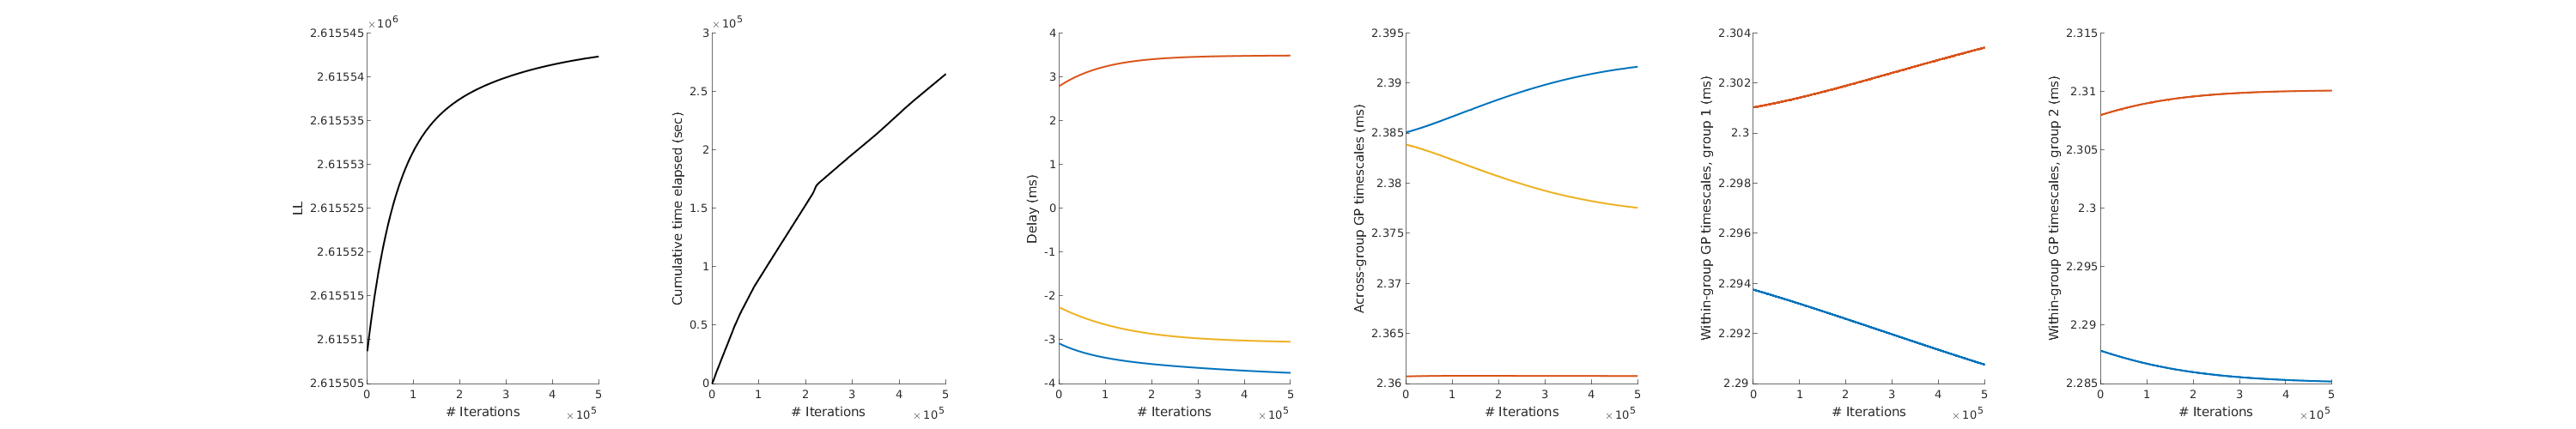

In [11]:
%plot -s 3000,500
% Plot training progress of various quantities. These plots can help with
% troubleshooting, if necessary.
plotFittingProgress(res, ...
                    'freqLL', freqLL, ...
                    'freqParam', freqParam, ...
                    'units', 'ms');

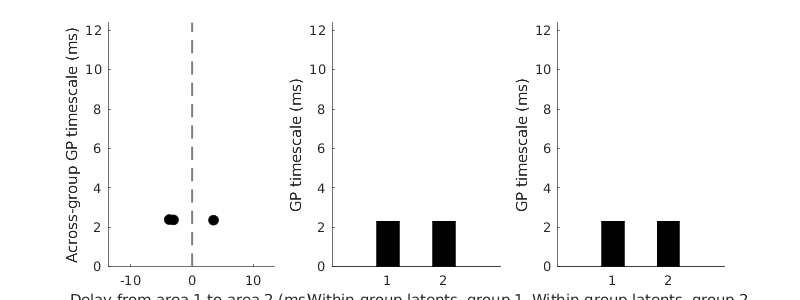

In [12]:
%plot -s 800,300
% Plot estimated and ground truth delays and across-group GP timescales
% together on the same plot. For these scatterplots, it's more
% straightforward to match ground truth latents to corresponding
% estimates.
plotGPparams_dlag(res.estParams, res.binWidth,...
                  res.rGroups, 'units', 'ms');

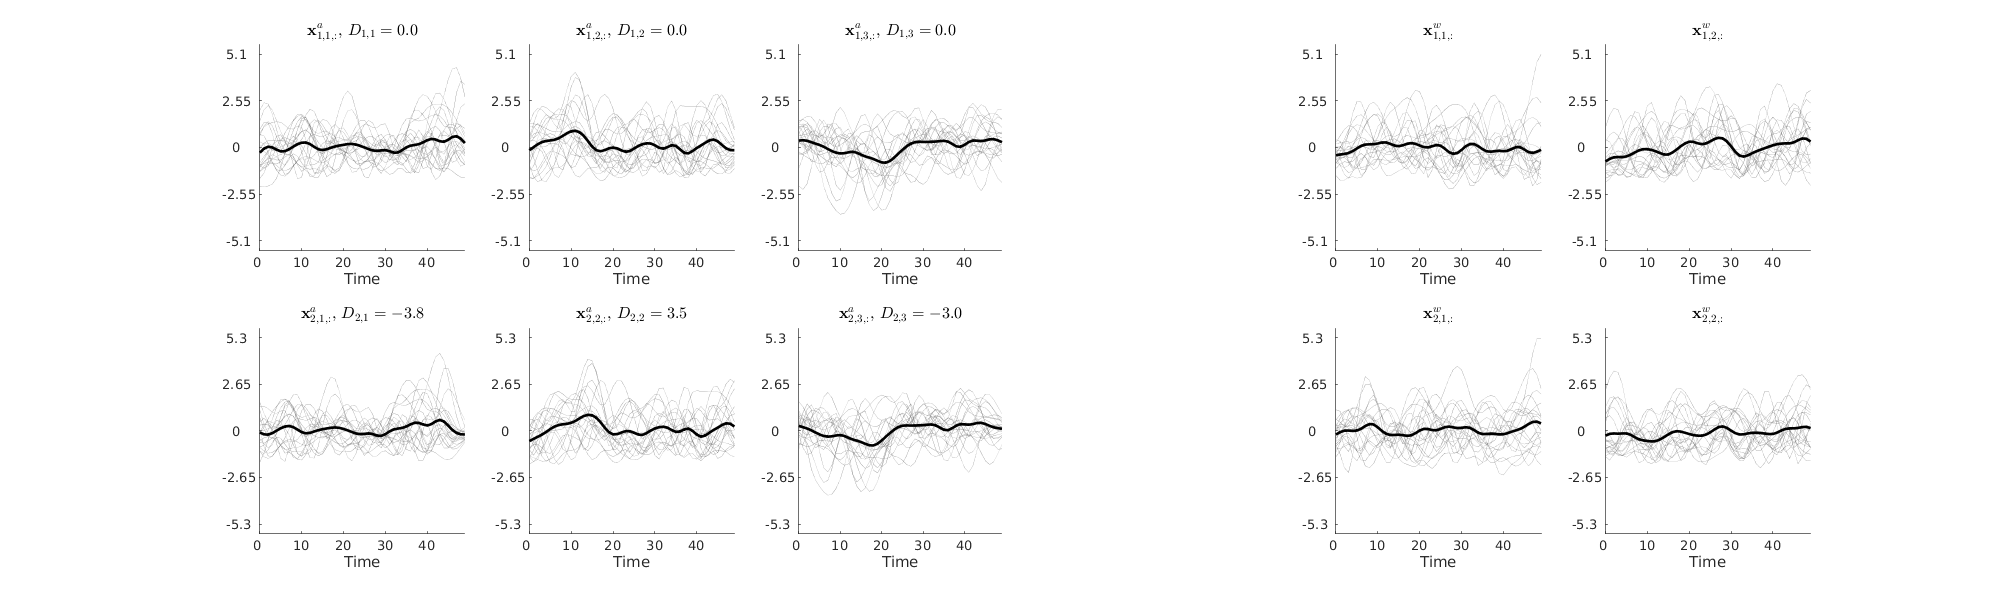

In [13]:
%plot -s 2000,600
% Plot estimated latents
[seqTrain, ~] = exactInferenceWithLL_dlag(data, res.estParams);
plotDimsVsTime_dlag(seqTrain, 'xsm', res.estParams, res.binWidth, ...
                  'nPlotMax', 20, ...
                  'plotSingle', true, ...
                  'plotMean', true, ...
                  'units', []);

In [14]:
groupSeq = partitionObs(seqTrain, xDim_total, 'datafield', 'xsm');

In [15]:
[latent_across_1, latent_within_1] = partitionLatents_meanOnly(groupSeq{1}, ...
    xDim_across, xDim_within(1), 'xpec', 'xsm');

In [16]:
[latent_across_2, latent_within_2] = partitionLatents_meanOnly(groupSeq{2}, ...
    xDim_across, xDim_within(2), 'xpec', 'xsm');

In [17]:
latent_across_1 = cat(3,latent_across_1.xsm);
latent_across_2 = cat(3,latent_across_2.xsm);

In [18]:
latent_across = cat(2, latent_across_1, latent_across_2);

In [19]:
latent_sigma = cellfun(@(x) cov(squeeze(x)'), ...
    num2cell(latent_across, [2 3]), 'UniformOutput', false);


cb = 

  ColorBar with properties:

    Location: 'layout'
      Limits: [0 2]
    FontSize: 9
    Position: [0.9325 0.3825 0.0214 0.2700]
       Units: 'normalized'

  Use GET to show all properties



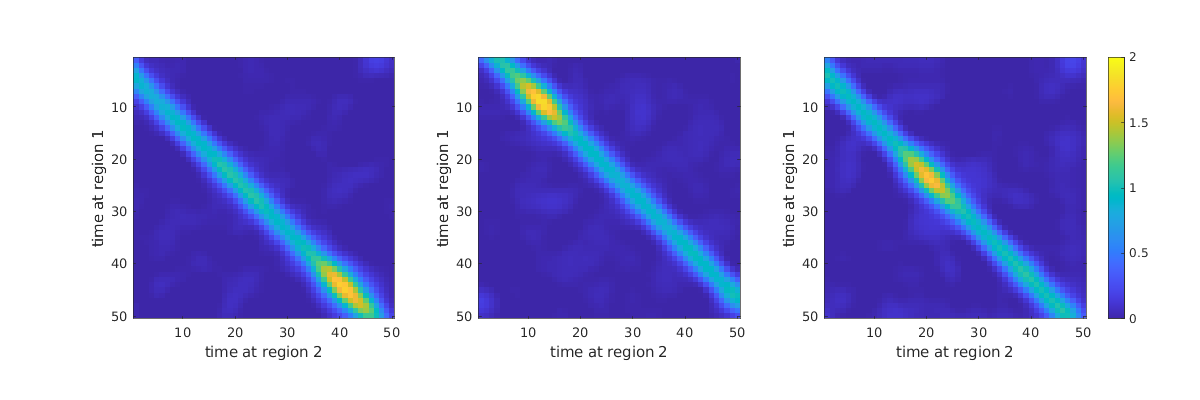

In [20]:
%plot -s 1200,400
tcl = tiledlayout(1,3);
for i = 1:3
    nexttile()
    imagesc(latent_sigma{i}(1:num_time,num_time+1:2*num_time))
    caxis([0 2])
    axis square
    xlabel('time at region 2')
    ylabel('time at region 1')
end
cb = colorbar(); 
cb.Layout.Tile = 'east'

In [21]:
latent_rho = cellfun(@(x) corrcoef(squeeze(x)'), ...
    num2cell(latent_across, [2 3]), 'UniformOutput', false);


cb = 

  ColorBar with properties:

    Location: 'layout'
      Limits: [0 1]
    FontSize: 9
    Position: [0.9325 0.1100 0.0214 0.8150]
       Units: 'normalized'

  Use GET to show all properties



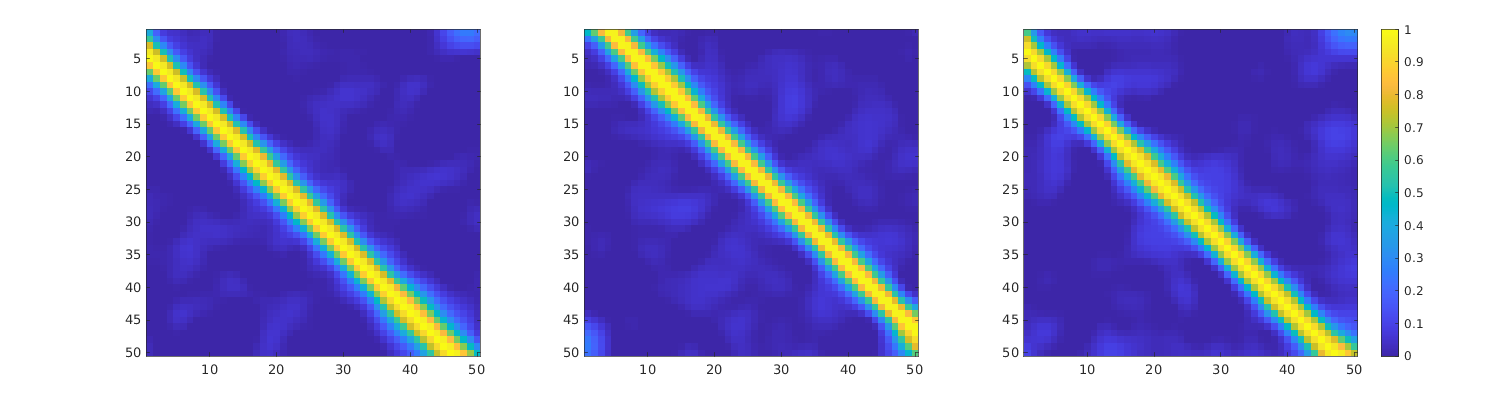

In [22]:
%plot -s 1500,400
tcl = tiledlayout(1,3);
for i = 1:3
    nexttile()
    imagesc(latent_rho{i}(1:num_time,num_time+1:2*num_time))
    caxis([0 1])
end
cb = colorbar(); 
cb.Layout.Tile = 'east'

In [23]:
groupParams = partitionParams_dlag(res.estParams);

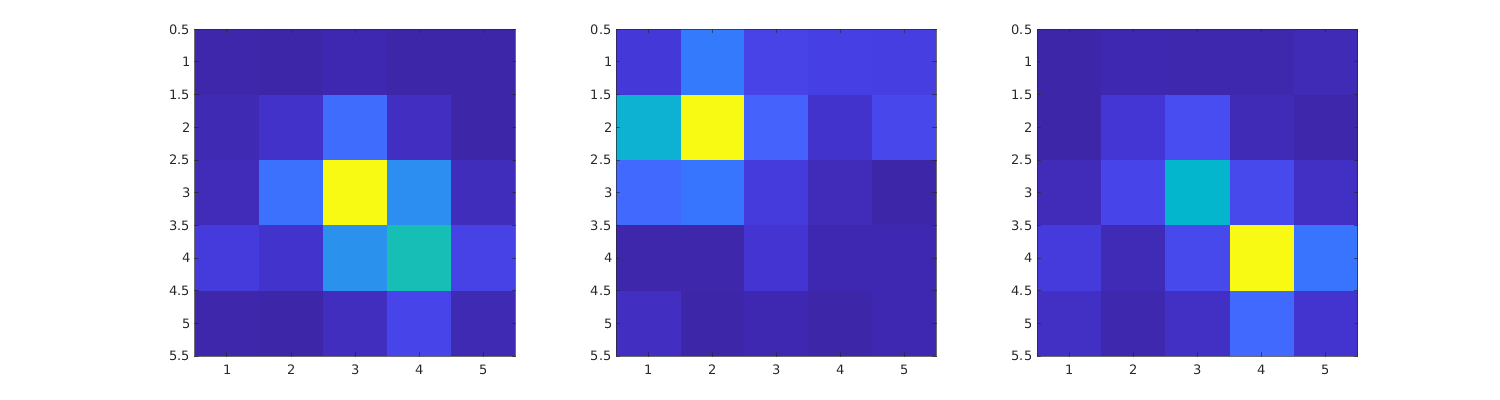

In [24]:
%plot -s 1500,400
for i = 1:xDim_across
    subplot(1,3,i)
    imagesc(abs(reshape(groupParams{1}.C(:,i), 5, 5)))
end

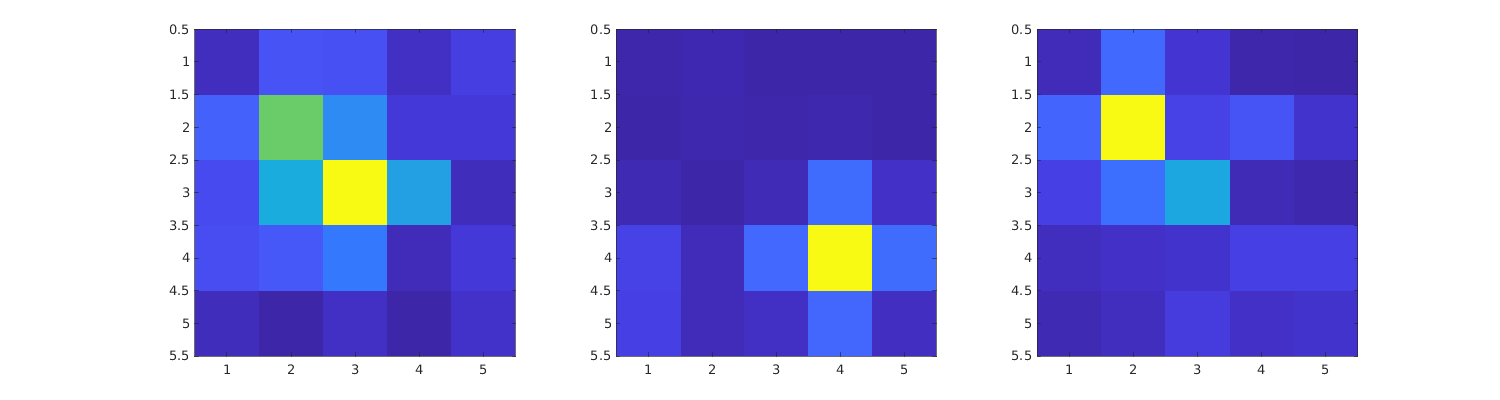

In [25]:
%plot -s 1500,400
for i = 1:xDim_across
    subplot(1,3,i)
    imagesc(abs(reshape(groupParams{2}.C(:,i), 5, 5)))
end

In [28]:
Sigma_DLAG = latent_sigma;
latent_DLAG = latent_across;
C_0 = groupParams{1}.C(:,1:3);
C_1 = groupParams{2}.C(:,1:3);
save(sprintf('%s/result_simulation_10_DLAG.mat', data_dir), 'Sigma_DLAG', 'latent_DLAG', 'C_0', 'C_1')